# Introduction

This project is based on real-world data from Instacart Market — one of the largest online grocery platforms in North America, connecting customers with local supermarkets and delivering groceries to their doors. This data reflects actual customer behavior: what they buy, how often they reorder products, and when they place their orders.


## Main goals of the analysis:
- Perform customer segmentation to identify the most valuable groups.
- Explore shopping behavior: reorder patterns, cart structure and add position, order frequency and regularity.
- Apply ABC-XYZ and RFM analysis to assess customer and product value.
- Identify key products (top sellers and low performers) by frequency and reorder rate.
- Analyze temporal patterns of orders (by hour and day of week).
- Why it matters? Insights help optimize marketing campaigns, assortment planning, and logistics. The insights from this analysis allow us to be as informed as possible when making business decisions that will have major impacts on customers.

# ------------------------------------------------
# 1. Initial Imports & Setup
# ------------------------------------------------

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import missingno as msno 

import os
from pathlib import Path
import logging

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

output_dir = "Outputs"
os.makedirs(output_dir, exist_ok=True)

# ------------------------------------------------
# 2. Initial Tables & Analysis
# ------------------------------------------------

In [3]:
aisles['aisle'] = pd.Categorical(aisles['aisle'])

display(aisles.info())
display(aisles.head(3))
print('\n')
print('Missing values:')
display(aisles.isna().sum())
print('\n')
print('Duplicates:')
display(aisles.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   aisle_id  134 non-null    int64   
 1   aisle     134 non-null    category
dtypes: category(1), int64(1)
memory usage: 6.6 KB


None

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars




Missing values:


aisle_id    0
aisle       0
dtype: int64



Duplicates:


0

In [4]:
departments['department'] = pd.Categorical(departments['department'])

display(departments.info())
display(departments.head(3))
print('\n')
print('Missing values:')
display(departments.isna().sum())
print('\n')
print('Duplicates:')
display(departments.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   department_id  21 non-null     int64   
 1   department     21 non-null     category
dtypes: category(1), int64(1)
memory usage: 1.0 KB


None

,department_id,department
0,1,frozen
1,2,other
2,3,bakery




Missing values:


department_id    0
department       0
dtype: int64



Duplicates:


0

In [5]:
display(order_products__prior.info())
display(order_products__prior.head(3))
print('\n')
print('Missing values:')
display(order_products__prior.isna().sum())
print('\n')
print('Duplicates:')
display(order_products__prior.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


None

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0




Missing values:


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64



Duplicates:


0

In [6]:
display(order_products__train.info())
display(order_products__train.head(3))
print('\n')
print('Missing values:')
display(order_products__train.isna().sum())
print('\n')
print('Duplicates:')
display(order_products__train.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


None

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0




Missing values:


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64



Duplicates:


0

In [7]:
orders['eval_set'] = pd.Categorical(orders['eval_set'])
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)

display(orders.info())
display(orders.head(3))
print('\n')
print('Missing values:')
display(orders.isna().sum())
print('\n')
print('Duplicates:')
display(orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                category
 3   order_number            int64   
 4   order_dow               int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
dtypes: category(1), float64(1), int64(5)
memory usage: 159.9 MB


None

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0




Missing values:


order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64



Duplicates:


0

In [8]:
products['product_name'] = pd.Categorical(products['product_name'])
products['product_name'] = products['product_name'].apply(
    lambda x: x.encode('ascii', 'ignore').decode('utf-8') if isinstance(x, str) else x
)

display(products.info())
display(products.head(3))
print('\n')
print('Missing values:')
display(products.isna().sum())
print('\n')
print('Duplicates:')
display(products.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7




Missing values:


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64



Duplicates:


0

# ------------------------------------------------
# 3. Dataset Combining & Preparation
# ------------------------------------------------

In [9]:
order_products = pd.concat([order_products__prior, order_products__train], axis=0)

orders_partition = pd.merge(order_products, orders, how = 'inner', on = 'order_id')

In [10]:
order_products.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [11]:
orders_partition.head(10)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0
5,2,17794,6,1,202279,prior,3,5,9,8.0
6,2,40141,7,1,202279,prior,3,5,9,8.0
7,2,1819,8,1,202279,prior,3,5,9,8.0
8,2,43668,9,0,202279,prior,3,5,9,8.0
9,3,33754,1,1,205970,prior,16,5,17,12.0


In [12]:
intermediate_df = pd.merge(products, aisles, how = 'left', on = 'aisle_id')

products_df = pd.merge(intermediate_df, departments, how = 'left', on = 'department_id')

In [13]:
intermediate_df.head(10)

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,2,All-Seasons Salt,104,13,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation
5,6,Dry Nose Oil,11,11,cold flu allergy
6,7,Pure Coconut Water With Orange,98,7,juice nectars
7,8,Cut Russet Potatoes Steam N' Mash,116,1,frozen produce
8,9,Light Strawberry Blueberry Yogurt,120,16,yogurt
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,water seltzer sparkling water


In [14]:
products_df.head(10)

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
5,6,Dry Nose Oil,11,11,cold flu allergy,personal care
6,7,Pure Coconut Water With Orange,98,7,juice nectars,beverages
7,8,Cut Russet Potatoes Steam N' Mash,116,1,frozen produce,frozen
8,9,Light Strawberry Blueberry Yogurt,120,16,yogurt,dairy eggs
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,water seltzer sparkling water,beverages


In [15]:
full_df = pd.merge(products_df, orders_partition, how = 'right', on = 'product_id')

full_df = full_df.sort_values(by = 'order_id', ignore_index = True)[["user_id", "order_id", "eval_set", "order_number", 
                                                                  "order_dow", "order_hour_of_day",
                                                                  "days_since_prior_order", "add_to_cart_order", "reordered",
                                                                  "product_id", "product_name", "aisle_id", "aisle", 
                                                                  "department_id", "department"]]

In [16]:
full_df.head(10)

,user_id,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_id,product_name,aisle_id,aisle,department_id,department
0,112108,1,train,4,4,10,9.0,1,1,49302,Bulgarian Yogurt,120,yogurt,16,dairy eggs
1,112108,1,train,4,4,10,9.0,3,0,10246,Organic Celery Hearts,83,fresh vegetables,4,produce
2,112108,1,train,4,4,10,9.0,4,0,49683,Cucumber Kirby,83,fresh vegetables,4,produce
3,112108,1,train,4,4,10,9.0,5,1,43633,Lightly Smoked Sardines in Olive Oil,95,canned meat seafood,15,canned goods
4,112108,1,train,4,4,10,9.0,6,0,13176,Bag of Organic Bananas,24,fresh fruits,4,produce
5,112108,1,train,4,4,10,9.0,7,0,47209,Organic Hass Avocado,24,fresh fruits,4,produce
6,112108,1,train,4,4,10,9.0,8,1,22035,Organic Whole String Cheese,21,packaged cheese,16,dairy eggs
7,112108,1,train,4,4,10,9.0,2,1,11109,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,other creams cheeses,16,dairy eggs
8,202279,2,prior,3,5,9,8.0,1,1,33120,Organic Egg Whites,86,eggs,16,dairy eggs
9,202279,2,prior,3,5,9,8.0,2,1,28985,Michigan Organic Kale,83,fresh vegetables,4,produce


In [17]:
full_df = full_df.rename(columns = {"order_dow": "order_day"})

day_map = {
    0: "Sun",
    1: "Mon",
    2: "Tue",
    3: "Wed",
    4: "Thu",
    5: "Fri",
    6: "Sat"
}

full_df["order_day"] = full_df["order_day"].map(day_map)

In [18]:
full_df

,user_id,order_id,eval_set,order_number,order_day,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_id,product_name,aisle_id,aisle,department_id,department
0,112108,1,train,4,Thu,10,9.0,1,1,49302,Bulgarian Yogurt,120,yogurt,16,dairy eggs
1,112108,1,train,4,Thu,10,9.0,3,0,10246,Organic Celery Hearts,83,fresh vegetables,4,produce
2,112108,1,train,4,Thu,10,9.0,4,0,49683,Cucumber Kirby,83,fresh vegetables,4,produce
3,112108,1,train,4,Thu,10,9.0,5,1,43633,Lightly Smoked Sardines in Olive Oil,95,canned meat seafood,15,canned goods
4,112108,1,train,4,Thu,10,9.0,6,0,13176,Bag of Organic Bananas,24,fresh fruits,4,produce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,25247,3421083,prior,24,Tue,6,21.0,5,0,35211,Organic Strawberry & Mango Dried Tiny Fruits,92,baby food formula,18,babies
33819102,25247,3421083,prior,24,Tue,6,21.0,6,1,39678,Free & Clear Natural Dishwasher Detergent,74,dish detergents,17,household
33819103,25247,3421083,prior,24,Tue,6,21.0,7,0,11352,Organic Mini Sandwich Crackers Peanut Butter,78,crackers,19,snacks
33819104,25247,3421083,prior,24,Tue,6,21.0,8,0,4600,All Natural French Toast Sticks,52,frozen breakfast,1,frozen


In [19]:
print(full_df.info(), end = '\n\n')

print(f'Missing Values:\n{full_df.isna().sum()}') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   order_id                int64   
 2   eval_set                category
 3   order_number            int64   
 4   order_day               object  
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_id              int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  aisle                   category
 13  department_id           int64   
 14  department              category
dtypes: category(3), float64(1), int64(9), object(2)
memory usage: 3.1+ GB
None

Missing Values:
user_id                   0
order_id                  0
eval_set                  0
order_number              0
order_day                 0
or

# ------------------------------------------------
# 4. Data Exploration & Visualization
# ------------------------------------------------

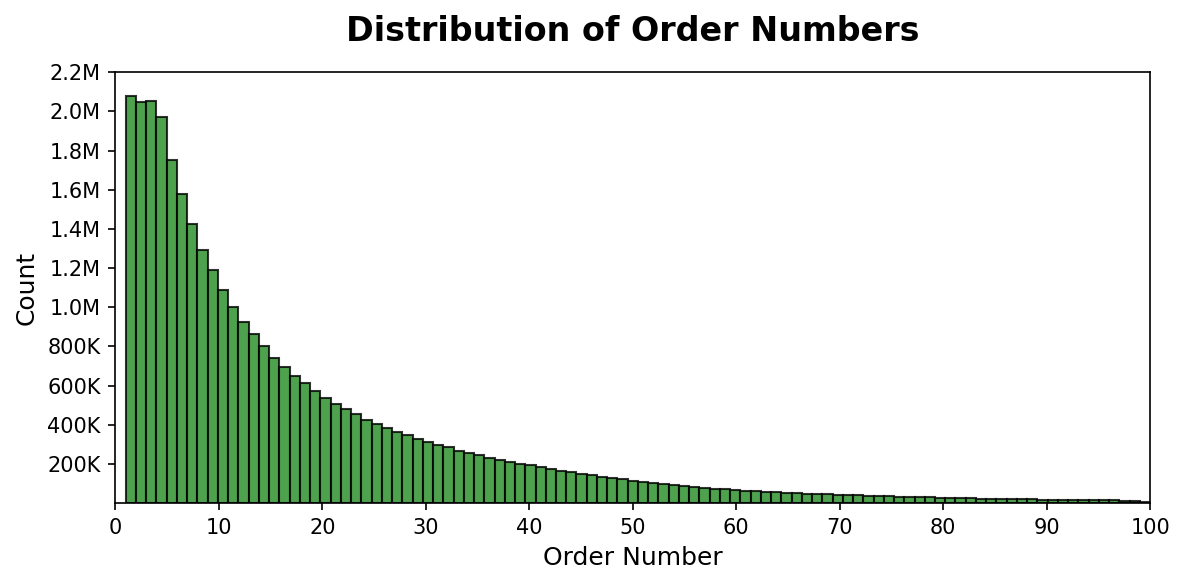

In [20]:
def format_yticks(x, pos):
    if x < 1_000_000:
        return f'{int(x/1_000)}K'
    else:
        return f'{x/1_000_000:.1f}M'

fig, ax = plt.subplots(figsize = (8, 4), dpi = 150)


ax.hist(full_df['order_number'], bins = 100, color = 'forestgreen', edgecolor = 'black', alpha = 0.8)


yticks = [200_000, 400_000, 600_000, 800_000, 1_000_000, 1_200_000, 1_400_000, 1_600_000, 1_800_000, 2_000_000, 2_200_000]
ax.set_yticks(yticks)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_yticks))
plt.xticks(np.arange(0, 101, 10))

ax.set_facecolor('white')
fig.patch.set_facecolor('white')

ax.set_title('Distribution of Order Numbers', pad = 15, fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Order Number', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
ax.set_xlim(0, 100)

plt.tight_layout();

plt.savefig(os.path.join(output_dir, "order_number_distributions.png"), dpi = 100, bbox_inches = "tight")

plt.show()

<ipython-input-21-02a96929b60a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{int(interval.left)} - {int(interval.right)}" for interval in reorder_rate['days_bin']], rotation = 0)


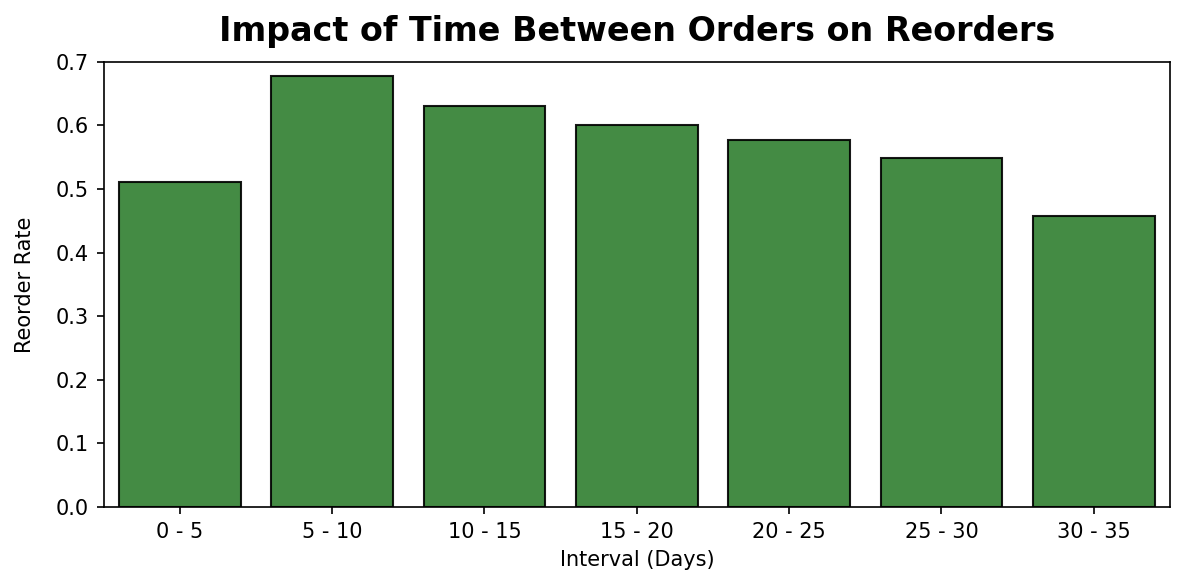

In [21]:
bins = np.arange(0, full_df['days_since_prior_order'].max() + 6, 5) 
full_df['days_bin'] = pd.cut(full_df['days_since_prior_order'], bins = bins, right = False)

reorder_rate = full_df.groupby('days_bin', observed=False)['reordered'].mean().reset_index()

fig, ax = plt.subplots(figsize = (8, 4), dpi = 150)

sns.barplot(data = reorder_rate, x = 'days_bin', y = 'reordered', color = 'forestgreen', edgecolor = 'black', alpha = 0.9, ax = ax)

ax.set_xticklabels([f"{int(interval.left)} - {int(interval.right)}" for interval in reorder_rate['days_bin']], rotation = 0)
ax.set_ylim(0, 0.7)
ax.set_ylabel('Reorder Rate', labelpad = 10)
ax.set_xlabel('Interval (Days)')
ax.set_title('Impact of Time Between Orders on Reorders', pad = 10, fontsize = 16, fontweight = 'bold')

plt.tight_layout()

plt.savefig(os.path.join(output_dir, "order_interval_vs_reorder_rate.png"), dpi = 100, bbox_inches = "tight")

plt.show()

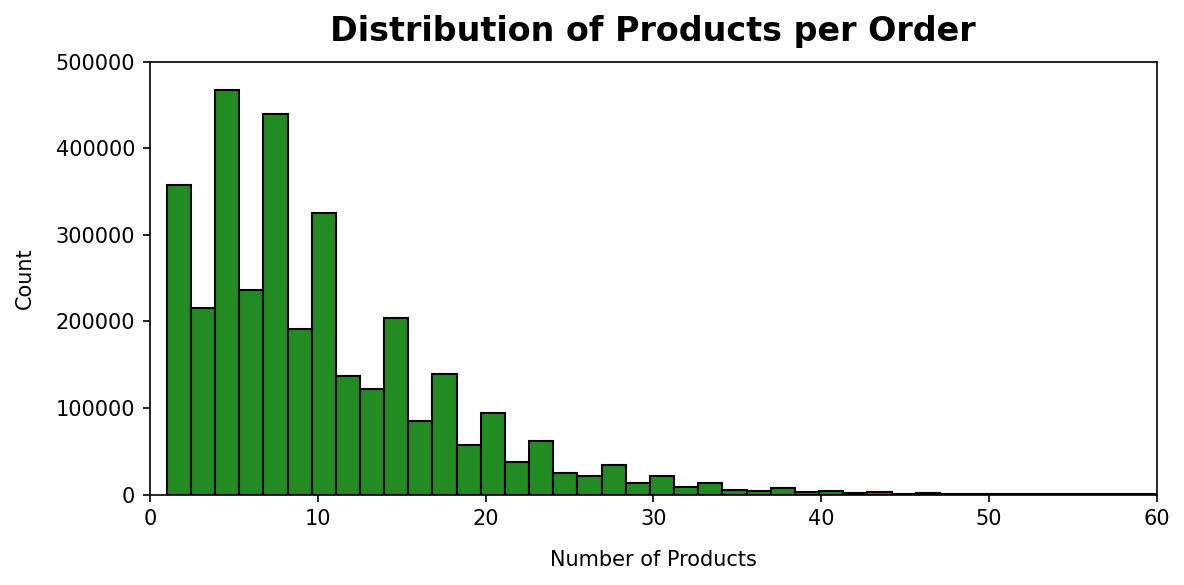

In [22]:
items_per_order = full_df.groupby('order_id').size()

fig, ax = plt.subplots(figsize = (8, 4), dpi = 150)

ax.hist(items_per_order, bins = 100, color = 'forestgreen', edgecolor = 'black')
ax.set_xlim(0, 60)
ax.set_ylim(0, 500000)
ax.set_xticks(np.arange(0, 61, 10))

ax.set_xlabel('Number of Products', labelpad = 10)
ax.set_ylabel('Count', labelpad = 10)
ax.set_title('Distribution of Products per Order', pad = 10, fontsize = 16, fontweight = 'bold')

plt.tight_layout()

plt.savefig(os.path.join(output_dir, "products_per_order.png"), dpi = 100, bbox_inches = "tight")

plt.show()

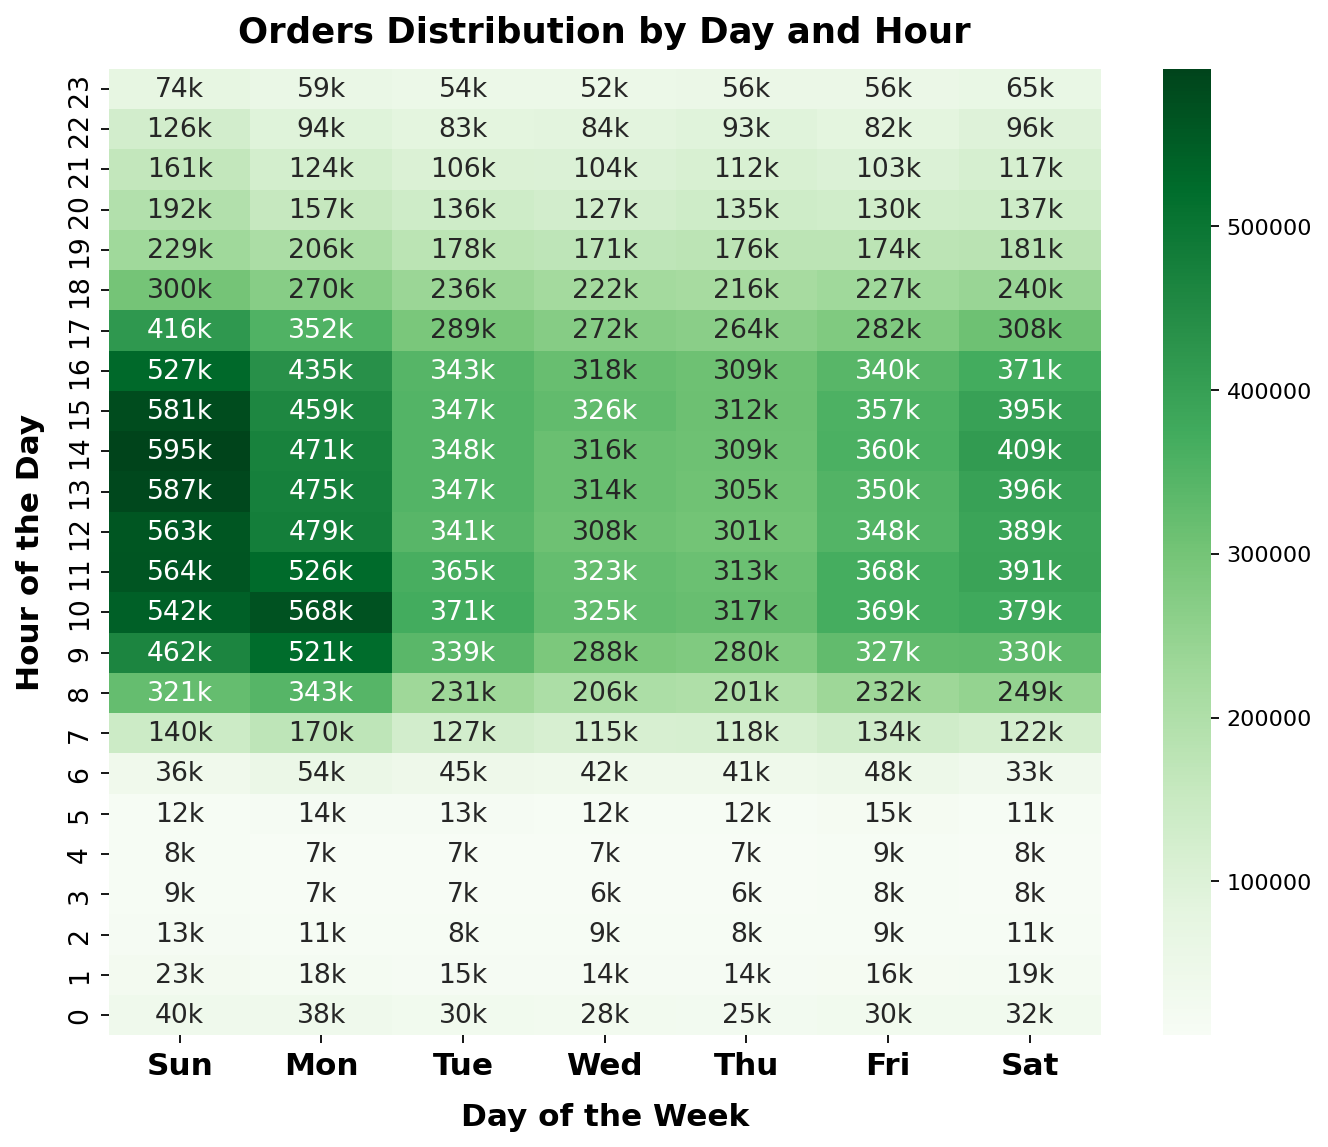

In [23]:
matrix = full_df.pivot_table(values = 'order_id', index = 'order_hour_of_day', columns = 'order_day', aggfunc = 'count')

order_day = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
matrix = matrix.reindex(columns = order_day)

def k_format(x):
    return f'{int(x/1000)}k'

annot = np.vectorize(k_format)(matrix.values)

fig, ax = plt.subplots(figsize = (10, 8), dpi = 160)

sns.heatmap(matrix, ax = ax, cmap = 'Greens', annot = annot, fmt ='', cbar_kws = {'format': '%.0f'}, annot_kws = {'fontsize': 12}) 

plt.title('Orders Distribution by Day and Hour', pad = 12, fontsize = 16, fontweight = 'bold')
plt.xlabel('Day of the Week', labelpad = 10, fontsize = 14, fontweight = 'bold')
plt.ylabel('Hour of the Day', labelpad = 10, fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize =14, fontweight = 'bold')
plt.yticks(fontsize =12)
ax.invert_yaxis()

plt.tight_layout

plt.savefig(os.path.join(output_dir, "day_hour_distribution_matrix.png"), dpi = 100, bbox_inches = "tight")

plt.show;

# Findings: Orders distribution by time

Peak hours are 9AM – 5PM, with highest activity at 10AM – 3 PM.

Morning: 7 – 9AM is also fairly strong.

Evening: 5 – 8PM shows about half the volume of midday and stronger activity than the morning.

Nighttime: 12 – 5 AM almost no activity.

Day of week: busiest are Sunday, Monday, and Saturday. This coincides with weekends and bank holidays.

Conclusion: marketing campaigns should target golden hours (9 AM – 2 PM) and weekends with highest order volumes.

In [24]:
top_15_aisles = full_df['aisle'].value_counts().head(15).sort_values(ascending = True)

top_15_departments = full_df['department'].value_counts().head(15).sort_values(ascending = True)

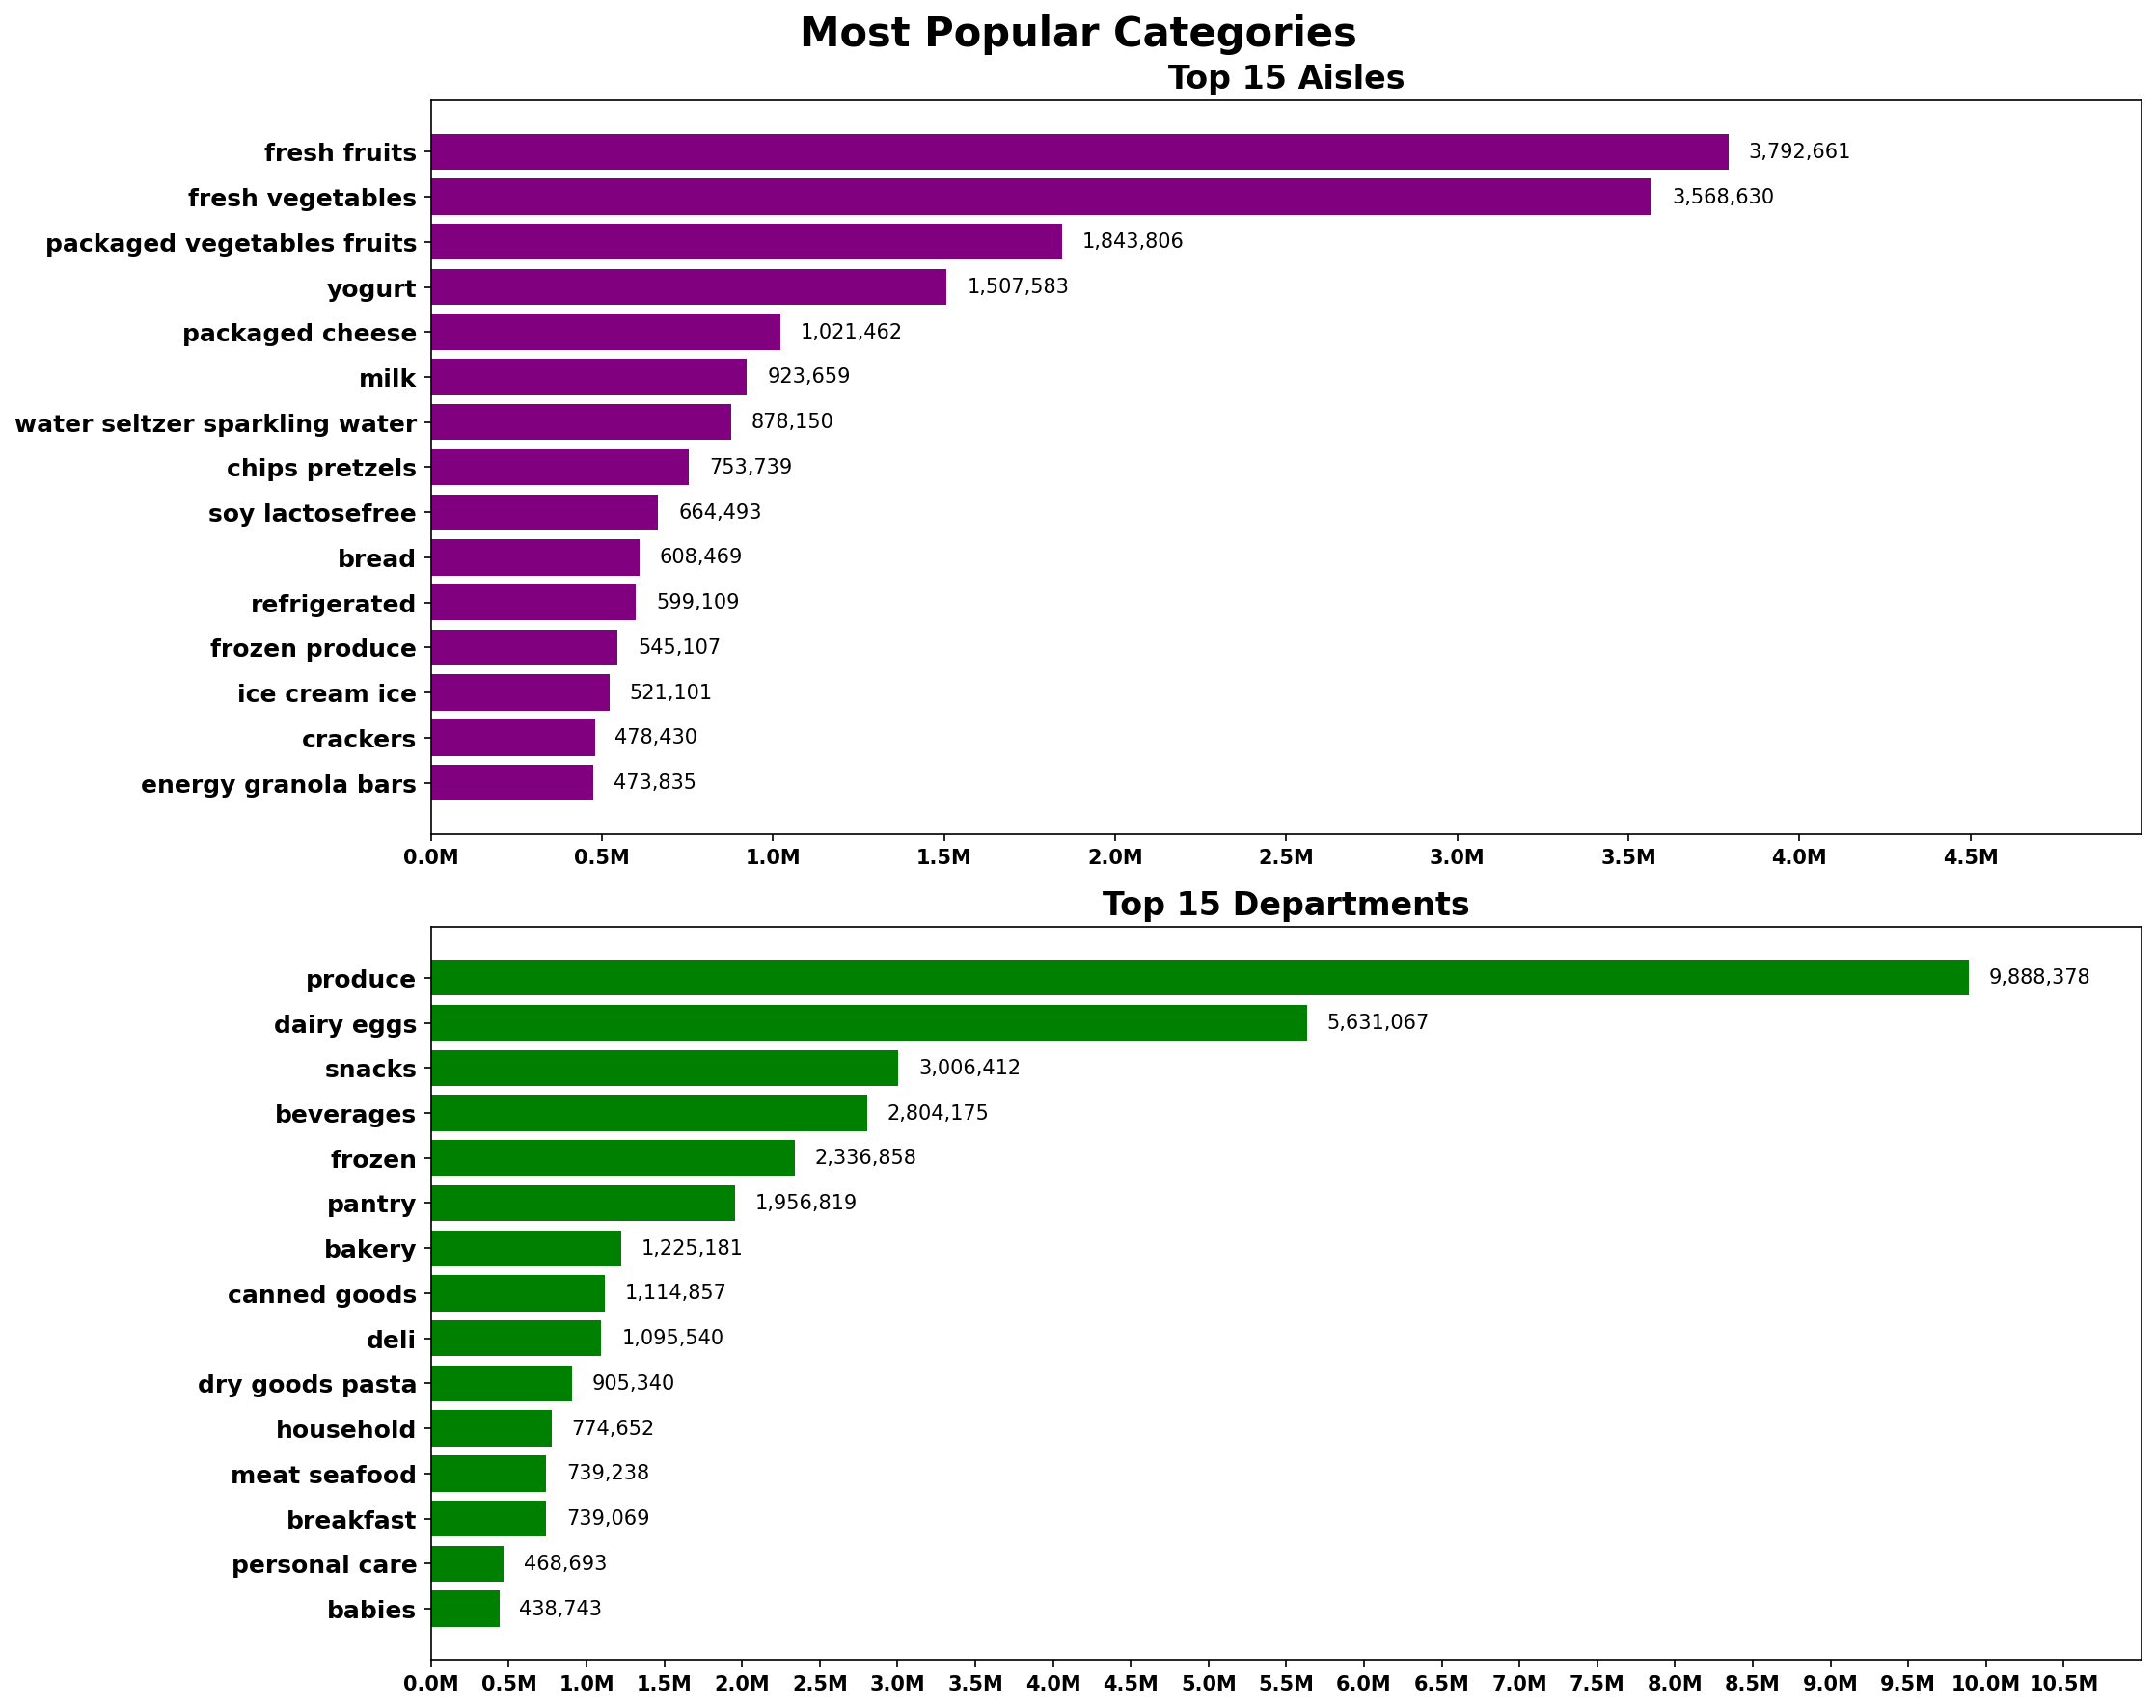

In [25]:
fig, ax = plt.subplots(figsize = (15,12), dpi = 150, nrows = 2, ncols = 1)

ax[0].barh(top_15_aisles.index, top_15_aisles.values, color = 'purple')
ax[1].barh(top_15_departments.index, top_15_departments.values, color = 'green')

def millions(x, pos):
    return f'{x*1e-6:.1f}M'
    
formatter = mticker.FuncFormatter(millions)


for a in ax:
    a.grid(True, linestyle = '', alpha = 0.6)
    a.tick_params(axis = 'y', labelsize = 12)
    for label in a.get_yticklabels():
        label.set_fontweight('bold')
    for label in a.get_xticklabels():
        label.set_fontweight('bold')

x_ticks_0 = np.arange(0, 5_000_000, 500_000) 

ax[0].set_xlim(0, 5_000_000)
ax[0].set_xticks(x_ticks_0)
ax[0].tick_params(axis = 'y', labelsize = 12)
ax[0].tick_params(axis = 'x', labelsize = 10)
ax[0].bar_label(ax[0].containers[0], fmt = '{:,.0f}', padding = 10)  
ax[0].xaxis.set_major_formatter(formatter)


x_ticks_1 = np.arange(0, 11_000_000, 500_000)  

ax[1].set_xlim(0, 11_000_000)
ax[1].set_xticks(x_ticks_1)
ax[1].tick_params(axis = 'y', labelsize = 12)
ax[1].tick_params(axis = 'x', labelsize = 10)
ax[1].bar_label(ax[1].containers[0], fmt = '{:,.0f}', padding = 10) 
ax[1].xaxis.set_major_formatter(formatter)


fig.suptitle('Most Popular Categories', fontsize = 20, fontweight = 'bold')
ax[0].set_title('Top 15 Aisles', fontsize = 16, fontweight = 'bold')
ax[1].set_title('Top 15 Departments', fontsize = 16, fontweight = 'bold')

plt.savefig(os.path.join(output_dir, "top_15_aisles_departments.png"), dpi = 100, bbox_inches = "tight")

plt.tight_layout();

In [26]:
df_reordered_rate = full_df.groupby('product_name', observed = False).agg(support = ('product_name', 'size'), reorders = ('reordered', 'sum')).reset_index()

df_reordered_rate['reordered_rate'] = np.where(df_reordered_rate['reorders'] > 0, round(df_reordered_rate['reorders'] / df_reordered_rate['support'], 3), 0)

In [27]:
top_20 = df_reordered_rate[df_reordered_rate['support'] >= 1000].sort_values(by = 'reordered_rate', ascending = False).head(20)


top_20['product_name'] = top_20['product_name'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))

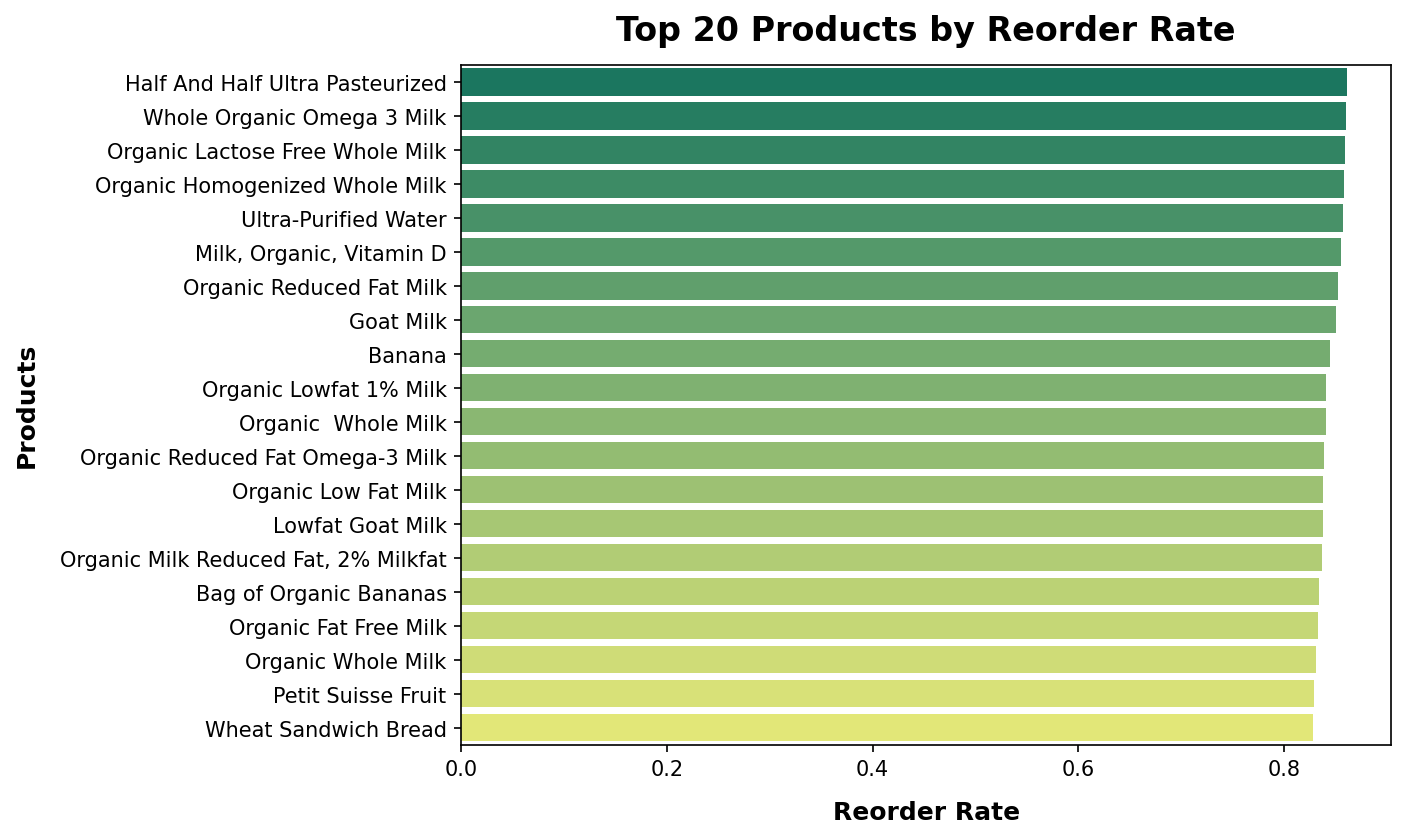

In [28]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 150)

sns.barplot(data = top_20, x = 'reordered_rate', y = 'product_name', ax = ax, palette = 'summer')

plt.title('Top 20 Products by Reorder Rate', fontweight = 'bold', fontsize = 16, pad = 12)
plt.xlabel('Reorder Rate', fontweight = 'bold', fontsize = 12, labelpad = 10)
plt.ylabel('Products', fontweight = 'bold', fontsize = 12, labelpad = 10)

plt.savefig(os.path.join(output_dir, "products_reorder_rate.png"), dpi = 100, bbox_inches = "tight");

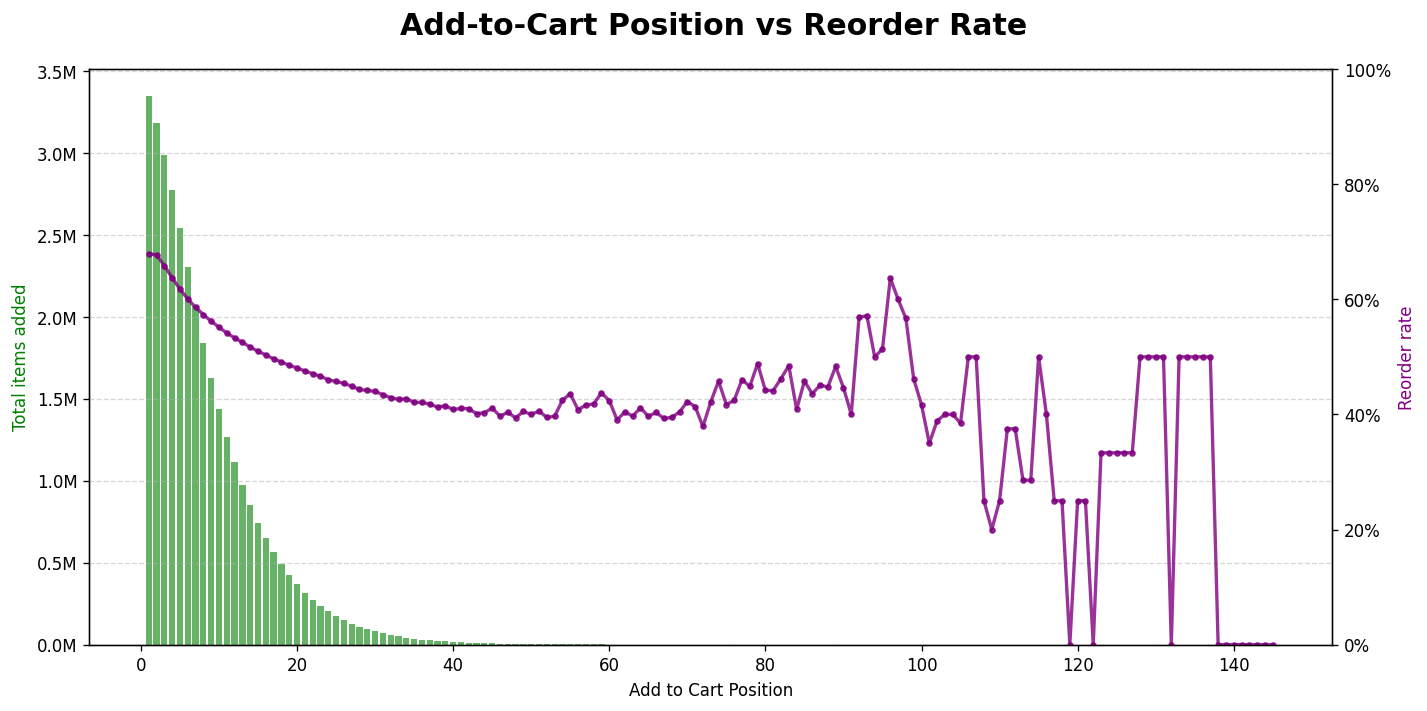

In [29]:
pos_stats = (full_df.groupby('add_to_cart_order', observed = False).agg(total = ('reordered', 'size'), reorders = ('reordered', 'sum')))
pos_stats['reorder_rate'] = pos_stats['reorders'] / pos_stats['total']

fig, ax1 = plt.subplots(figsize = (12, 6), dpi = 120)

ax1.bar(pos_stats.index, pos_stats['total'], color = 'green', alpha = 0.6, label = 'Total Adds (Millions)')
ax1.set_xlabel('Add to Cart Position')
ax1.set_ylabel('Total items added', color = 'green')

ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

ax2 = ax1.twinx()
ax2.plot(pos_stats.index, pos_stats['reorder_rate'], color = 'purple',  alpha = 0.8, marker = 'o', markersize = 3, linewidth = 2, label = 'Reorder rate')
ax2.set_ylabel('Reorder rate', color = 'purple')
ax2.set_ylim(0, 1)

fig.suptitle('Add-to-Cart Position vs Reorder Rate', fontsize = 18, fontweight = 'bold')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.5)

ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))

plt.savefig(os.path.join(output_dir, "cart_position_vs_reorder_rate.png"), dpi = 100, bbox_inches = "tight")

plt.tight_layout();

# Findings (Reorder vs Cart Position)

Hypothesis: earlier item addition shows higher importance and leads to greater reorder probability.

Chart: order positions 1–5 dominate items added withe total sitting above 2.5M. Reorder rate for first 2 cart positions ~65%, then gradual decline.

After add to cart position ~40, data becomes chaotic and unreliable.

Conclusion: hypothesis holds true and essentials go first which are reordered. Later additions to cart are unpredictable, noisy tail ignored.

# ------------------------------------------------
# 5. Key Metrices & Insights
# ------------------------------------------------

In [30]:
aisle_stats = full_df.groupby('aisle', observed = False).agg(mean_ord = ('add_to_cart_order', 'mean'), median_ord = ('add_to_cart_order', 'median'), first_add_rate = ('add_to_cart_order', lambda x: (x == 1).mean()))


print("Top 10 aisles with the lowest average cart position (added earliest)")
display(aisle_stats['mean_ord'].sort_values().head(10))
print()
print("Top 10 aisles with the lowest median cart position (added earliest)")
display(aisle_stats['median_ord'].sort_values().head(10))
print()
print("Top 10 aisles by first-add rate (most often the first item)")
display(aisle_stats['first_add_rate'].sort_values(ascending = False).head(10))

Top 10 aisles with the lowest average cart position (added earliest)


aisle
spirits                          4.853349
packaged produce                 5.141712
specialty wines champagnes       5.213740
beers coolers                    5.352127
milk                             5.576440
white wines                      5.598464
red wines                        5.947095
water seltzer sparkling water    6.086957
eggs                             6.435782
soft drinks                      6.469137
Name: mean_ord, dtype: float64


Top 10 aisles with the lowest median cart position (added earliest)


aisle
beers coolers                    3.0
spirits                          3.0
specialty wines champagnes       3.0
packaged produce                 4.0
water seltzer sparkling water    4.0
white wines                      4.0
milk                             4.0
red wines                        4.0
soft drinks                      4.0
cat food care                    5.0
Name: median_ord, dtype: float64


Top 10 aisles by first-add rate (most often the first item)


aisle
spirits                          0.297946
specialty wines champagnes       0.273180
beers coolers                    0.218235
milk                             0.212861
white wines                      0.212476
water seltzer sparkling water    0.191414
packaged produce                 0.184422
red wines                        0.179222
soft drinks                      0.173791
cold flu allergy                 0.165505
Name: first_add_rate, dtype: float64

# Cart Position Insights

- Alcoholic drinks often getted added first to a customers cart (~30% of orders).
- Milk and water also get added early.
- Packaged produce & soda slightly later.
- Median cart position: alcohol ~3, milk ~4.
- Medicine category surprisingly appears in top picks, potentially explains period of the year.

In [31]:
unique_orders = full_df['order_id'].nunique()

penetration = (full_df.groupby('aisle', observed = False)['order_id'].nunique().sort_values(ascending = False) / unique_orders)

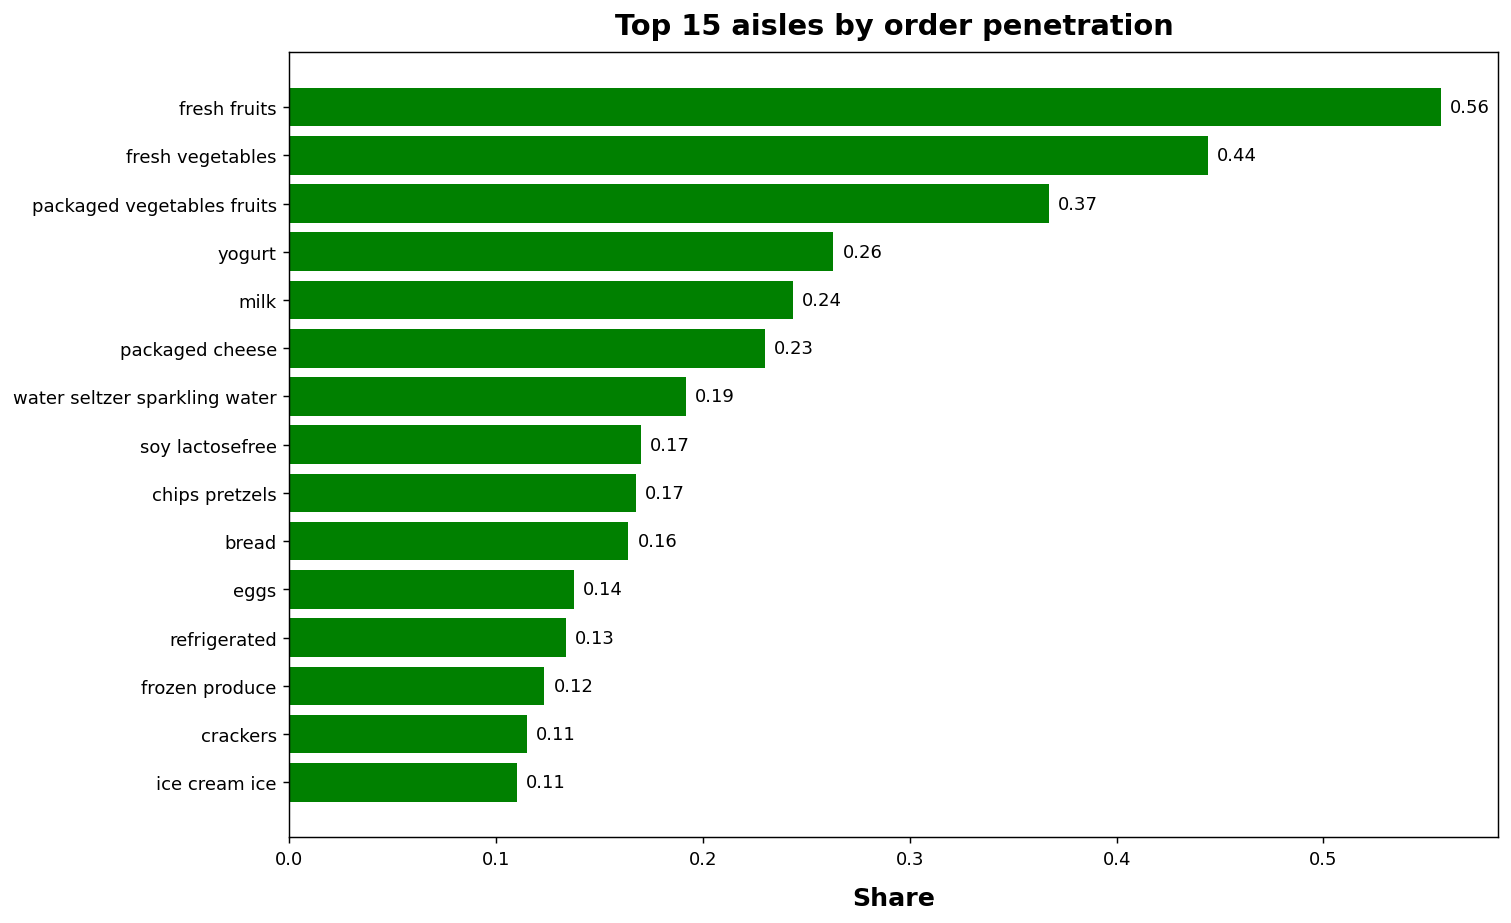

In [32]:
pen_best = penetration.head(15).sort_values()

fig, ax = plt.subplots(figsize = (12, 8), dpi = 130)

ax.barh(pen_best.index, pen_best.values, color = 'green')

plt.title('Top 15 aisles by order penetration', pad = 10, fontsize = 16, fontweight = 'bold')
plt.xlabel('Share', labelpad = 10, fontsize = 14, fontweight = 'bold')

ax.bar_label(ax.containers[0], fmt = '%.2f', padding = 5)

plt.savefig(os.path.join(output_dir, "top_15_order_penetration.png"), dpi = 100, bbox_inches = "tight");

# Data Findings (Categories)

- Fresh produce dominate: fruits ~56%, vegetables ~44%. Around half of all orders have fresh fruit or veg in it.
- Dairy + packaged produce also strong: milk, yoghurt, and chees ~24-26%, packaged fruit and veg ~37%.
- Ice cream ~11% — treat, not staple.

# ------------------------------------------------
# 6. Cohort Analysis: Tracking Customer Behaviour
# ------------------------------------------------

In [33]:
orders['cohort_order'] = 1  

cohort_data = (orders.groupby(['cohort_order','order_number']).agg(users = ('user_id','nunique')).reset_index())

cohort_data['cohort_size'] = cohort_data['users'].max()
cohort_data['retention'] = cohort_data['users'] / cohort_data['cohort_size']


retention_matrix = cohort_data.pivot(index = 'cohort_order', columns = 'order_number', values = 'retention')

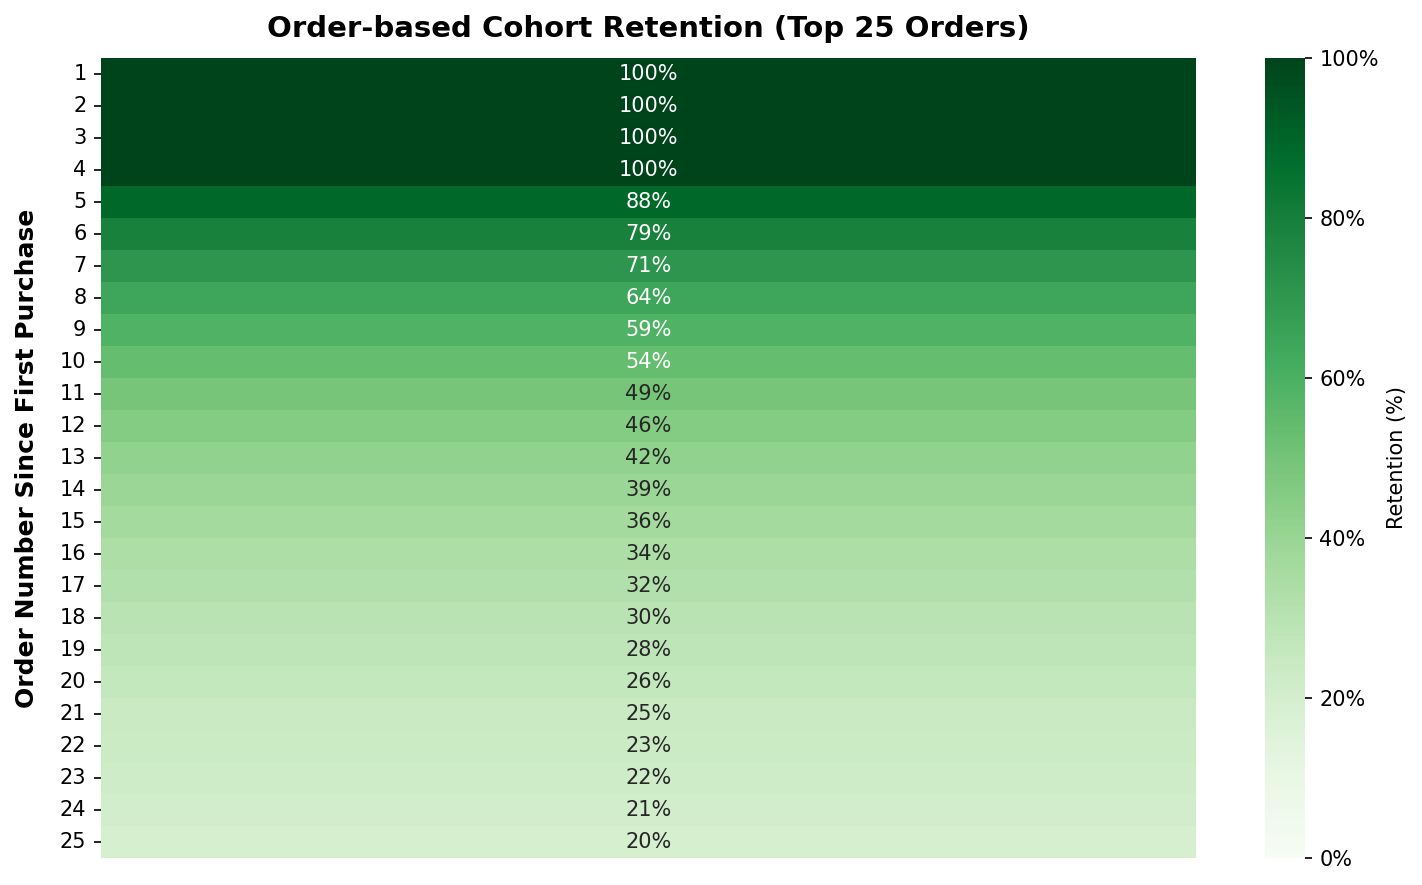

In [34]:
top25_retention = retention_matrix.T.head(25)

plt.figure(figsize = (10, 6), dpi = 150)
annot = top25_retention.applymap(lambda x: f"{x:.0%}")

ax = sns.heatmap(top25_retention, annot = annot, fmt = '', cmap = 'Greens', cbar_kws = {'label':'Retention (%)'}, vmin = 0, vmax = 1)
ax.axes.xaxis.set_visible(False)

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_ticklabels(['0%','20%','40%','60%','80%','100%'])


plt.title('Order-based Cohort Retention (Top 25 Orders)', fontsize = 14, fontweight = 'bold', pad = 10)
plt.xlabel('Cohort', fontsize = 12, fontweight = 'bold', labelpad = 10)
plt.ylabel('Order Number Since First Purchase', fontsize = 12, fontweight = 'bold', labelpad = 10)
plt.yticks(rotation = 0)

plt.savefig(os.path.join(output_dir, "top_25_cohort_retention.png"), dpi = 100, bbox_inches = "tight")

plt.tight_layout()

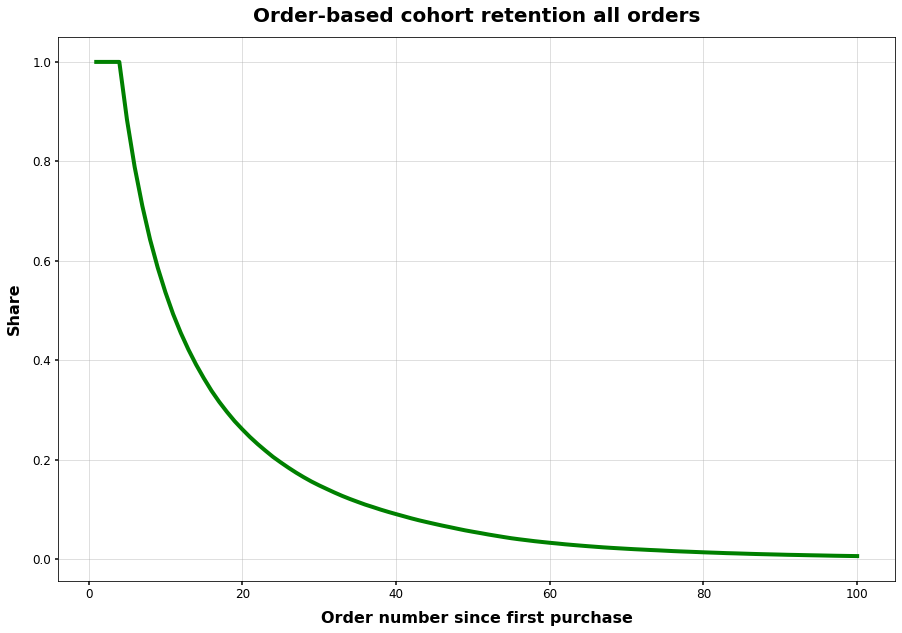

In [35]:
ax = retention_matrix.T.plot(figsize = (15, 10), legend = False, color = 'green', linewidth = 4)

ax.set_title('Order-based cohort retention all orders', fontsize = 20, fontweight = 'bold', pad = 15)

ax.set_xlabel('Order number since first purchase', fontsize = 16, fontweight = 'bold', labelpad = 10)

ax.set_ylabel('Share', fontsize = 16, fontweight = 'bold', labelpad = 10)

ax.grid(True, linestyle = '-', alpha = 0.5)

ax.tick_params(axis = 'both', labelsize = 12, width = 1.5)

plt.savefig(os.path.join(output_dir, "all_cohort_retention.png"), dpi = 100, bbox_inches = "tight")

plt.show()

# Retention Analysis

- Initial drop: by the 5th order, 88% remain and then a rapid drop off.
- Gradual decline: by the 25th order, only 20% remain.
- Most users churn after 10 orders. After 10 orders it is 50/50.
- Takeaway: critical retention window = first 5–10 orders.

# ------------------------------------------------
# 7. RFM Analysis: Analysing Customer Value
# ------------------------------------------------

In [36]:
orders['days_since_first_order'] = orders.groupby('user_id')['days_since_prior_order'].cumsum()

In [37]:
segment_map = {
    (5,1): "New\nCustomers",              
    (5,2): "Re-Engaging\nCustomers",     
    (5,3): "Emerging\nLoyalists",  
    (5,4): "Established\nLoyalists",    
    (5,5): "Brand\nChampions",

    (4,1): "Fading\nCustomers",              
    (4,2): "Target\nCustomers",     
    (4,3): "Emerging\nLoyalists",  
    (4,4): "Engaged\nRegulars",    
    (4,5): "Established\nLoyalists",

    (3,1): "Dormant",              
    (3,2): "Fading\nCustomers",     
    (3,3): "Fading\nCustomers",   
    (3,4): "Engaged\nRegulars",    
    (3,5): "Emerging\nLoyalists",

    (2,1): "Dormant",              
    (2,2): "Dormant",              
    (2,3): "Fading\nCustomers",   
    (2,4): "Target\nCustomers",   
    (2,5): "Fading\nCustomers",

    (1,1): "Lost",              
    (1,2): "Dormant",              
    (1,3): "Dormant",   
    (1,4): "Fading\nCustomers",   
    (1,5): "Previous\nChampions"
}

In [38]:
rf = orders.groupby('user_id').agg(max_order = ('order_number','max'), recency = ('days_since_first_order','max')).reset_index()

rf['frequency'] = rf['max_order']

rf = rf[['user_id','recency','frequency']]


rf['R_score'] = pd.qcut(rf['recency'], 5, labels = [5,4,3,2,1])  
rf['F_score'] = pd.qcut(rf['frequency'], 5, labels = [1,2,3,4,5]) 

rf['RF_score'] = rf['R_score'].astype(int) + rf['F_score'].astype(int)


rf['segment'] = rf.apply(lambda row: segment_map.get((int(row['R_score']), int(row['F_score']))), axis = 1)

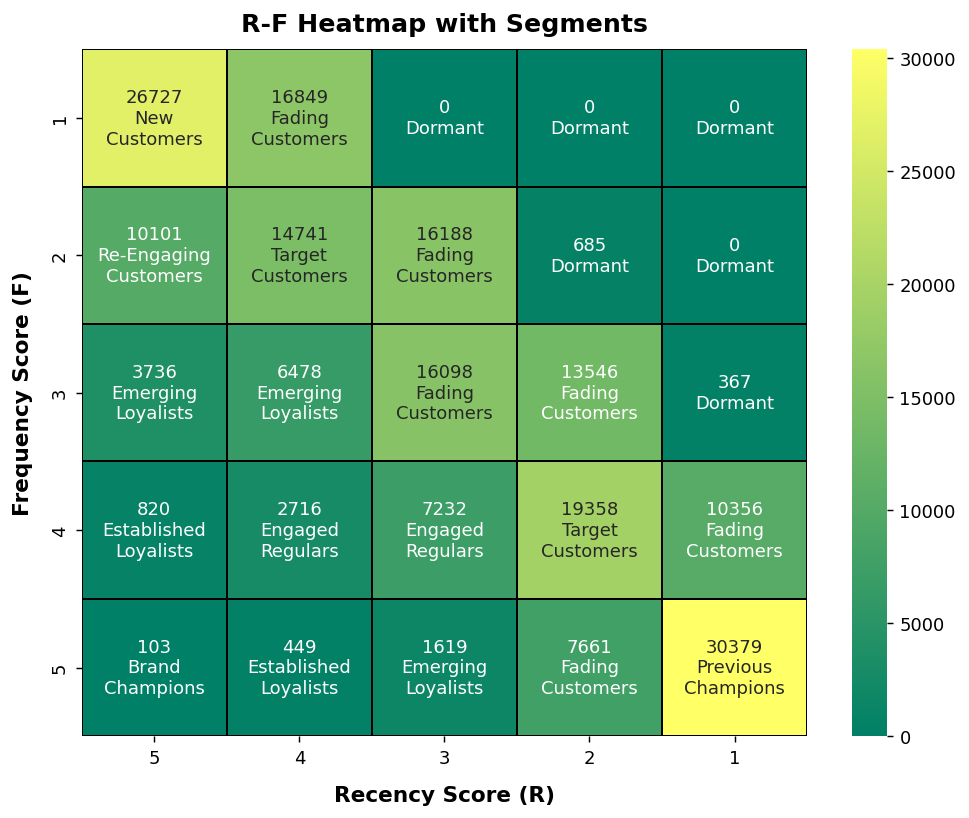

In [39]:
rf_heatmap = (rf.groupby(['R_score','F_score'], observed = False).size().reset_index(name = 'count').pivot(index = 'F_score', columns= 'R_score', values= 'count'))

annot_matrix = rf_heatmap.copy().astype(str)

for f in rf_heatmap.index:
    for r in rf_heatmap.columns:
        count = rf_heatmap.loc[f, r]
        segment = segment_map.get((r, f), "")
        annot_matrix.loc[f, r] = f"{count}\n{segment}"

plt.figure(figsize = (9,7), dpi = 130)
sns.heatmap(rf_heatmap.astype(float), annot = annot_matrix, fmt = '', cmap = 'summer', cbar = True, linewidths = 1, linecolor = 'black', annot_kws = {'size': 10})

plt.title('R-F Heatmap with Segments', fontsize = 14, fontweight = 'bold', pad = 10)
plt.ylabel('Frequency Score (F)', fontsize = 12, fontweight = 'bold', labelpad = 10)
plt.xlabel('Recency Score (R)', fontsize = 12, fontweight = 'bold', labelpad = 10);

plt.savefig(os.path.join(output_dir, "RF_heatmap.png"), dpi = 100, bbox_inches = "tight")

# 🧠 How to read:

Brand Champions (R=5,F=5): recent & frequent → very best users.

Lost (R=1,F=1): few orders and long ago → inactive.

Dormant: relatively few orders and reasonable time ago → reapproach.

Fading Customers: used to buy often but haven’t ordered for a while → risk of churn.

Engaged Regulars: steady buyers, though not always very recent → reliable regulars.

Emerging Loyalists / Established Loyalists: 

Target Customers / New Customers: transitional states, could become champions or churn depending on approach.

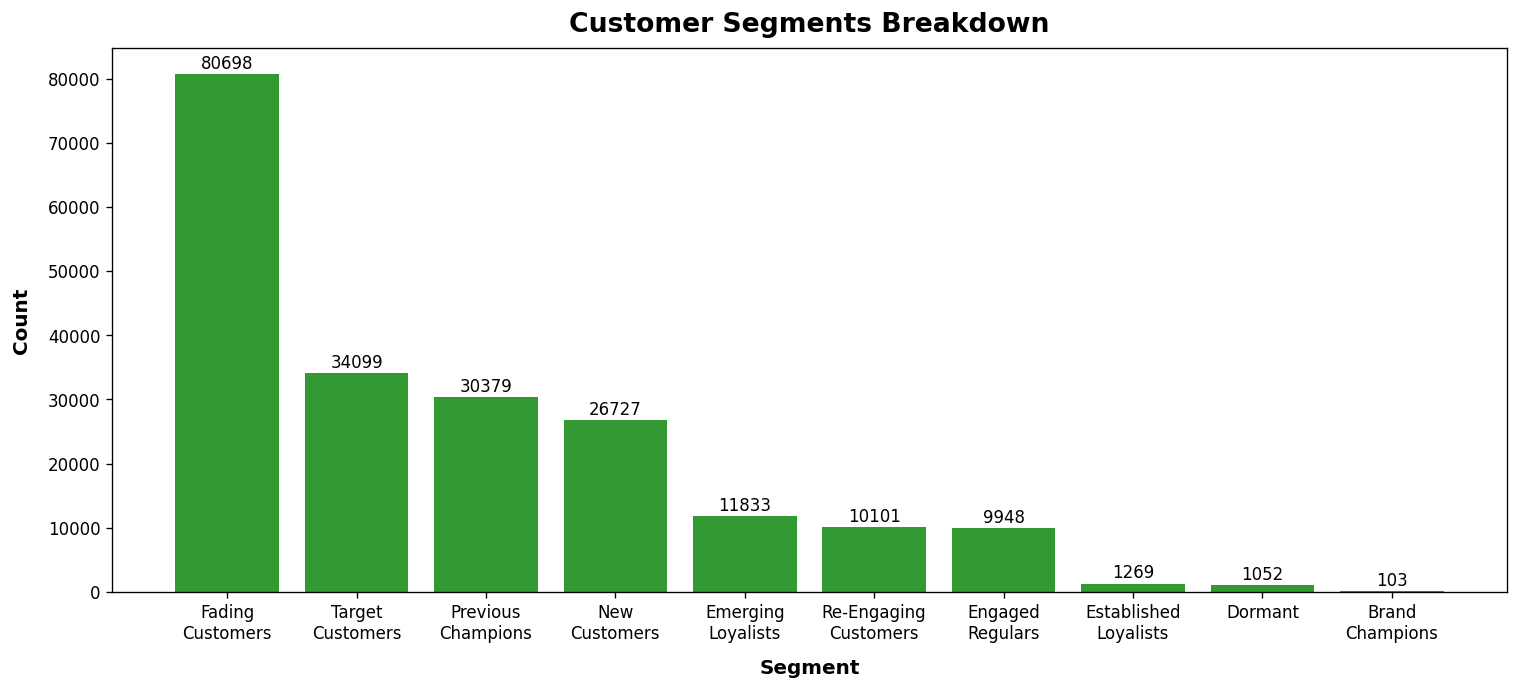

In [40]:
plt.figure(figsize = (15, 6), dpi = 120)

ax = plt.bar(rf['segment'].value_counts().index, rf['segment'].value_counts().values, width = 0.8, color = 'green', alpha = 0.8)

plt.title('Customer Segments Breakdown', fontsize = 16, fontweight = 'bold', pad = 10)
plt.xlabel('Segment', fontsize = 12, fontweight = 'bold', labelpad = 10)
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', labelpad = 10)

plt.bar_label(ax, padding = 1)

plt.savefig(os.path.join(output_dir, "RF_segment_breakdown.png"), dpi = 100, bbox_inches = "tight");

# 📝 Final Analysis (RF)

We conducted RF analysis (Recency + Frequency) on customer segments.

- Recency (R): how long since last order.
- Frequency (F): how many orders a user placed.

🚀 Recommendations (EN)

- Focus on Fading Customers and Target Customers.
- Nurture Emerging Loyalists and Engaged Regulars.
- Protect Champions and Established Loyalists.
- Gently approach Re-Engaging Customers, New customers, and Previous Champions.
- Limit spend on Dormant Customers.

# ------------------------------------------------
# 8. Product Performance Analysis
# ------------------------------------------------

In [41]:
abc_aisle = full_df.groupby('aisle', observed = False).agg(sales_volume = ('aisle', 'count'))

abc_aisle['share'] = (abc_aisle['sales_volume'].div(abc_aisle['sales_volume'].sum()).mul(100))

abc_aisle.sort_values(by = 'share', ascending = False, inplace = True)

abc_aisle['cum_share'] = abc_aisle['share'].cumsum()

abc_aisle.head()

,sales_volume,share,cum_share
aisle,,,
fresh fruits,3792661,11.214551,11.214551
fresh vegetables,3568630,10.552112,21.766663
packaged vegetables fruits,1843806,5.451966,27.218629
yogurt,1507583,4.457785,31.676414
packaged cheese,1021462,3.020370,34.696784


In [42]:
def abc_segmentation(s):
    '''function for segmentation ABC groups'''
    eps = 1e-6
    if 0 <= s < 80:
        return 'A'
    elif 80 <= s < 95:
        return 'B'
    elif 95 <= s <= 100 + eps :
        return 'C'
    else:
        return 'mistake'

abc_aisle['abc_segment'] = abc_aisle['cum_share'].apply(abc_segmentation)

In [43]:
aisle_bin = (full_df.groupby(['days_bin', 'aisle'], observed = False).size().reset_index(name = 'sales'))

bin_totals = (full_df.groupby('days_bin', observed = False).size().reset_index(name = 'total_sales'))

aisle_bin = aisle_bin.merge(bin_totals, on = 'days_bin', how = 'left')

aisle_bin['share'] = aisle_bin['sales'] / aisle_bin['total_sales']

xyz_aisle = (aisle_bin.groupby('aisle', observed = False).agg(mean_share = ('share', 'mean'), std_share = ('share', 'std')).reset_index())

xyz_aisle['cv'] = xyz_aisle['std_share'] / xyz_aisle['mean_share']

In [44]:
def xyz_segmentation(s):
    '''function for segmentation XYZ groups'''
    if s <= 0.25: 
        return 'X'
    elif s <= 0.5: 
        return 'Y'
    else:
        return 'Z'

xyz_aisle['xyz_segment'] = xyz_aisle['cv'].apply(xyz_segmentation)

In [45]:
abc_xyz = abc_aisle.merge(xyz_aisle[['aisle','xyz_segment']], on = 'aisle')

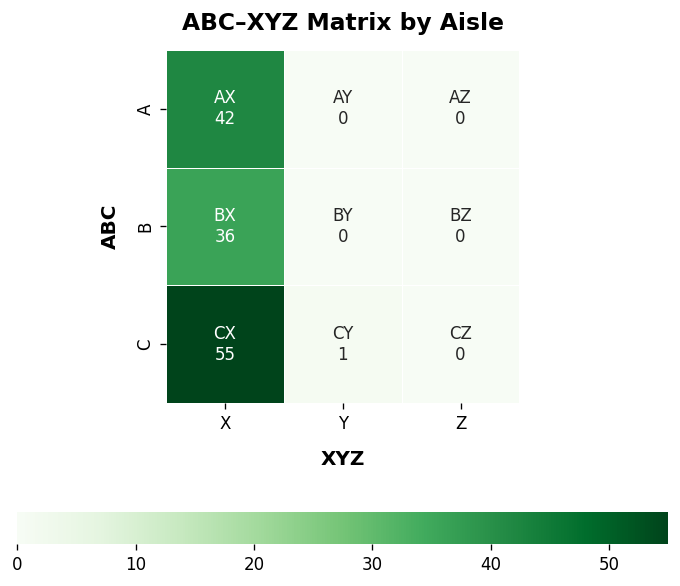

In [46]:
abc_order = ["A", "B", "C"]
xyz_order = ["X", "Y", "Z"]

matrix = abc_xyz.groupby(['abc_segment','xyz_segment']).size().unstack(fill_value = 0).reindex(index = abc_order, columns = xyz_order, fill_value = 0)


plt.figure(figsize = (7, 6), dpi =  120)

labels = matrix.copy().astype(str)
for i in matrix.index:
    for j in matrix.columns:
        labels.loc[i, j] = f"{i}{j}\n{matrix.loc[i, j]}"


sns.heatmap(matrix, fmt = '', cmap = 'Greens', annot = labels, cbar = True, linewidths = 0.5, linecolor = 'white', cbar_kws = {'orientation': 'horizontal', 'pad':0.20}, square = True)
plt.title('ABC–XYZ Matrix by Aisle', fontsize = 14, fontweight = 'bold', pad = 12)
plt.ylabel('ABC', fontsize = 12, fontweight = 'bold', labelpad = 10)
plt.xlabel('XYZ', fontsize = 12, fontweight = 'bold', labelpad = 10)

plt.savefig(os.path.join(output_dir, "ABC_XYZ_aisle_matrix.png"), dpi = 100, bbox_inches = "tight");

In [60]:
all_segments = [a + x for a in abc_order for x in xyz_order]

abc_xyz_sorted = abc_xyz.merge(xyz_aisle[['aisle','mean_share']], on='aisle')

abc_xyz_sorted['segment'] = abc_xyz_sorted['abc_segment'] + abc_xyz_sorted['xyz_segment']

segment_table = (
    abc_xyz_sorted.sort_values(['segment','mean_share'], ascending=[True, False])
    .groupby('segment')['aisle']
    .apply(list)
    .reindex(all_segments, fill_value=[])
    .reset_index()
)

segment_table['aisles'] = segment_table['aisle'].apply(lambda x: ', '.join(x) if x else '(none)')
segment_table['count'] = segment_table['aisle'].apply(len)
segment_table = segment_table[['segment','aisles','count']]
pd.set_option('display.max_colwidth', None)
segment_table

,segment,aisles,count
0,AX,"fresh fruits, fresh vegetables, packaged vegetables fruits, yogurt, packaged cheese, water seltzer sparkling water, milk, chips pretzels, soy lactosefree, bread, refrigerated, frozen produce, ice cream ice, crackers, eggs, energy granola bars, frozen meals, lunch meat, cereal, soft drinks, fresh herbs, fresh dips tapenades, soup broth bouillon, baby food formula, juice nectars, hot dogs bacon sausage, baking ingredients, other creams cheeses, cream, canned jarred vegetables, packaged produce, nuts seeds dried fruit, spreads, candy chocolate, canned meals beans, dry pasta, paper goods, butter, breakfast bakery, oils vinegars, tea, cookies cakes",42
1,AY,(none),0
2,AZ,(none),0
3,BX,"frozen breakfast, pasta sauce, condiments, instant foods, spices seasonings, coffee, frozen appetizers sides, tortillas flat bread, frozen pizza, fruit vegetable snacks, asian foods, popcorn jerky, hot cereal pancake mixes, grains rice dried goods, tofu meat alternatives, cleaning products, poultry counter, packaged poultry, preserved dips spreads, buns rolls, pickled goods olives, doughs gelatins bake mixes, frozen vegan vegetarian, energy sports drinks, laundry, salad dressing toppings, prepared meals, granola, dish detergents, canned fruit applesauce, specialty cheeses, frozen meat seafood, latino foods, breakfast bars pastries, prepared soups salads, missing",36
4,BY,(none),0
5,BZ,(none),0
6,CX,"canned meat seafood, cat food care, meat counter, food storage, oral hygiene, soap, honeys syrups nectars, marinades meat preparation, beers coolers, body lotions soap, plates bowls cups flatware, vitamins supplements, frozen breads doughs, fresh pasta, refrigerated pudding desserts, protein meal replacements, other, trail mix snack mix, red wines, dog food care, trash bags liners, hair care, packaged meat, bakery desserts, white wines, seafood counter, digestion, spirits, cold flu allergy, diapers wipes, baking supplies decor, mint gum, cocoa drink mixes, air fresheners candles, feminine care, packaged seafood, frozen dessert, muscles joints pain relief, more household, indian foods, deodorants, bulk grains rice dried goods, bulk dried fruits vegetables, kosher foods, shave needs, first aid, ice cream toppings, specialty wines champagnes, eye ear care, skin care, kitchen supplies, baby bath body care, baby accessories, beauty, frozen juice",55
7,CY,facial care,1
8,CZ,(none),0


# ABC–XYZ Analysis (aisle-level)

Purpose: measure aisle sales contribution (ABC) and demand stability (XYZ).

## Limitations:

Coefficient of variation skewed; normalized shares gave fairer stability scores.

“Non-classical” result — most aisles in X, reflecting dataset limits.

## Insights:

- A/B aisles (58% of sales) = consistently stable.
- C aisles = mostly stable, one CY outlier.
- Conclusion: stable core assortment, niche aisles more volatile.
- Next step: product-level analysis of Fresh Fruits and Frozen Juice (top and bottom aisles).

# ------------------------------------------------
# 9. Product Analysis in Highest-Share Category
# ------------------------------------------------

In [48]:
fresh_fruits_df = full_df[full_df['aisle'] == 'fresh fruits'].reset_index(drop = True).copy()

fresh_fruits_abc = (fresh_fruits_df['product_name'].value_counts(normalize = True)*100).sort_values(ascending = False).reset_index()

fresh_fruits_abc['cum_proportion'] = fresh_fruits_abc['proportion'].cumsum()

fresh_fruits_abc['abc_segment'] = fresh_fruits_abc['cum_proportion'].apply(abc_segmentation)

In [49]:
product_bin = (fresh_fruits_df.groupby(['days_bin', 'product_name'], observed = False).size().reset_index(name = 'sales'))

product_bin_totals = (fresh_fruits_df.groupby('days_bin', observed = False).size().reset_index(name = 'total_sales'))

product_bin = product_bin.merge(product_bin_totals, on = 'days_bin', how = 'left')

product_bin['share'] = product_bin['sales'] / product_bin['total_sales']

fresh_fruits_xyz = (product_bin.groupby('product_name', observed = False).agg(mean_share = ('share', 'mean'), std_share = ('share', 'std')).reset_index())

fresh_fruits_xyz['cv'] = fresh_fruits_xyz['std_share'] / fresh_fruits_xyz['mean_share']

fresh_fruits_xyz['xyz_segment'] = fresh_fruits_xyz['cv'].apply(xyz_segmentation)

In [50]:
abc_xyz_products = fresh_fruits_abc.merge(fresh_fruits_xyz[['product_name', 'xyz_segment']], how = 'left', on = 'product_name')

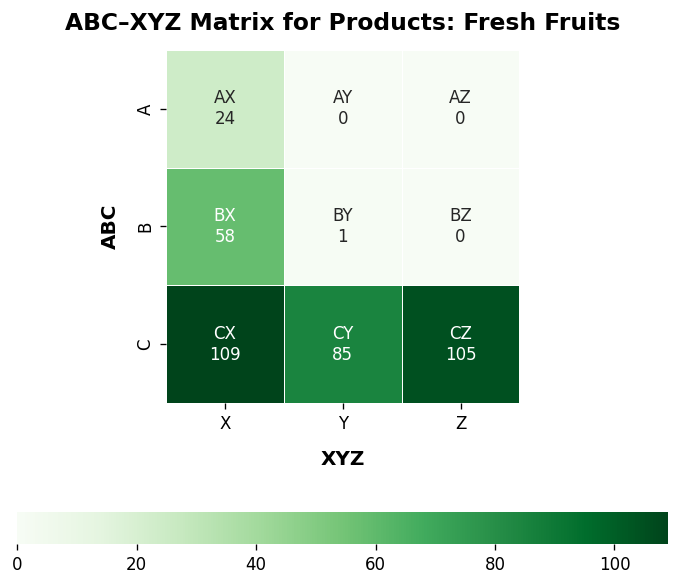

In [51]:
matrix_products = abc_xyz_products.groupby(['abc_segment','xyz_segment']).size().unstack(fill_value = 0).reindex(index = abc_order, columns = xyz_order, fill_value = 0)


plt.figure(figsize = (7, 6), dpi = 120)

labels = matrix_products.copy().astype(str)
for i in matrix_products.index:
    for j in matrix_products.columns:
        labels.loc[i, j] = f"{i}{j}\n{matrix_products.loc[i, j]}"


sns.heatmap(matrix_products, fmt = '', cmap = 'Greens', annot = labels, cbar = True, linewidths = 0.5, linecolor = 'white', cbar_kws = {'orientation': 'horizontal', 'pad':0.20}, square = True)
plt.title('ABC–XYZ Matrix for Products: Fresh Fruits', fontsize = 14, fontweight = 'bold', pad = 12)
plt.ylabel('ABC', fontsize = 12, fontweight = 'bold', labelpad = 10)
plt.xlabel('XYZ', fontsize = 12, fontweight = 'bold', labelpad = 10)

plt.savefig(os.path.join(output_dir, "ABC_XYZ_fresh_fruit_matrix.png"), dpi = 100, bbox_inches = "tight");

In [52]:
top_10_fresh_fruits = abc_xyz_products[(abc_xyz_products['abc_segment'] == 'A') & 
(abc_xyz_products['xyz_segment'] == 'X')].nlargest(10, 'proportion')[['product_name', 'proportion']]

tail_10_fresh_fruits = abc_xyz_products[(abc_xyz_products['abc_segment'] == 'C') & 
(abc_xyz_products['xyz_segment'] == 'Z')].nsmallest(10, 'proportion')[['product_name', 'proportion']].reset_index(drop = True)

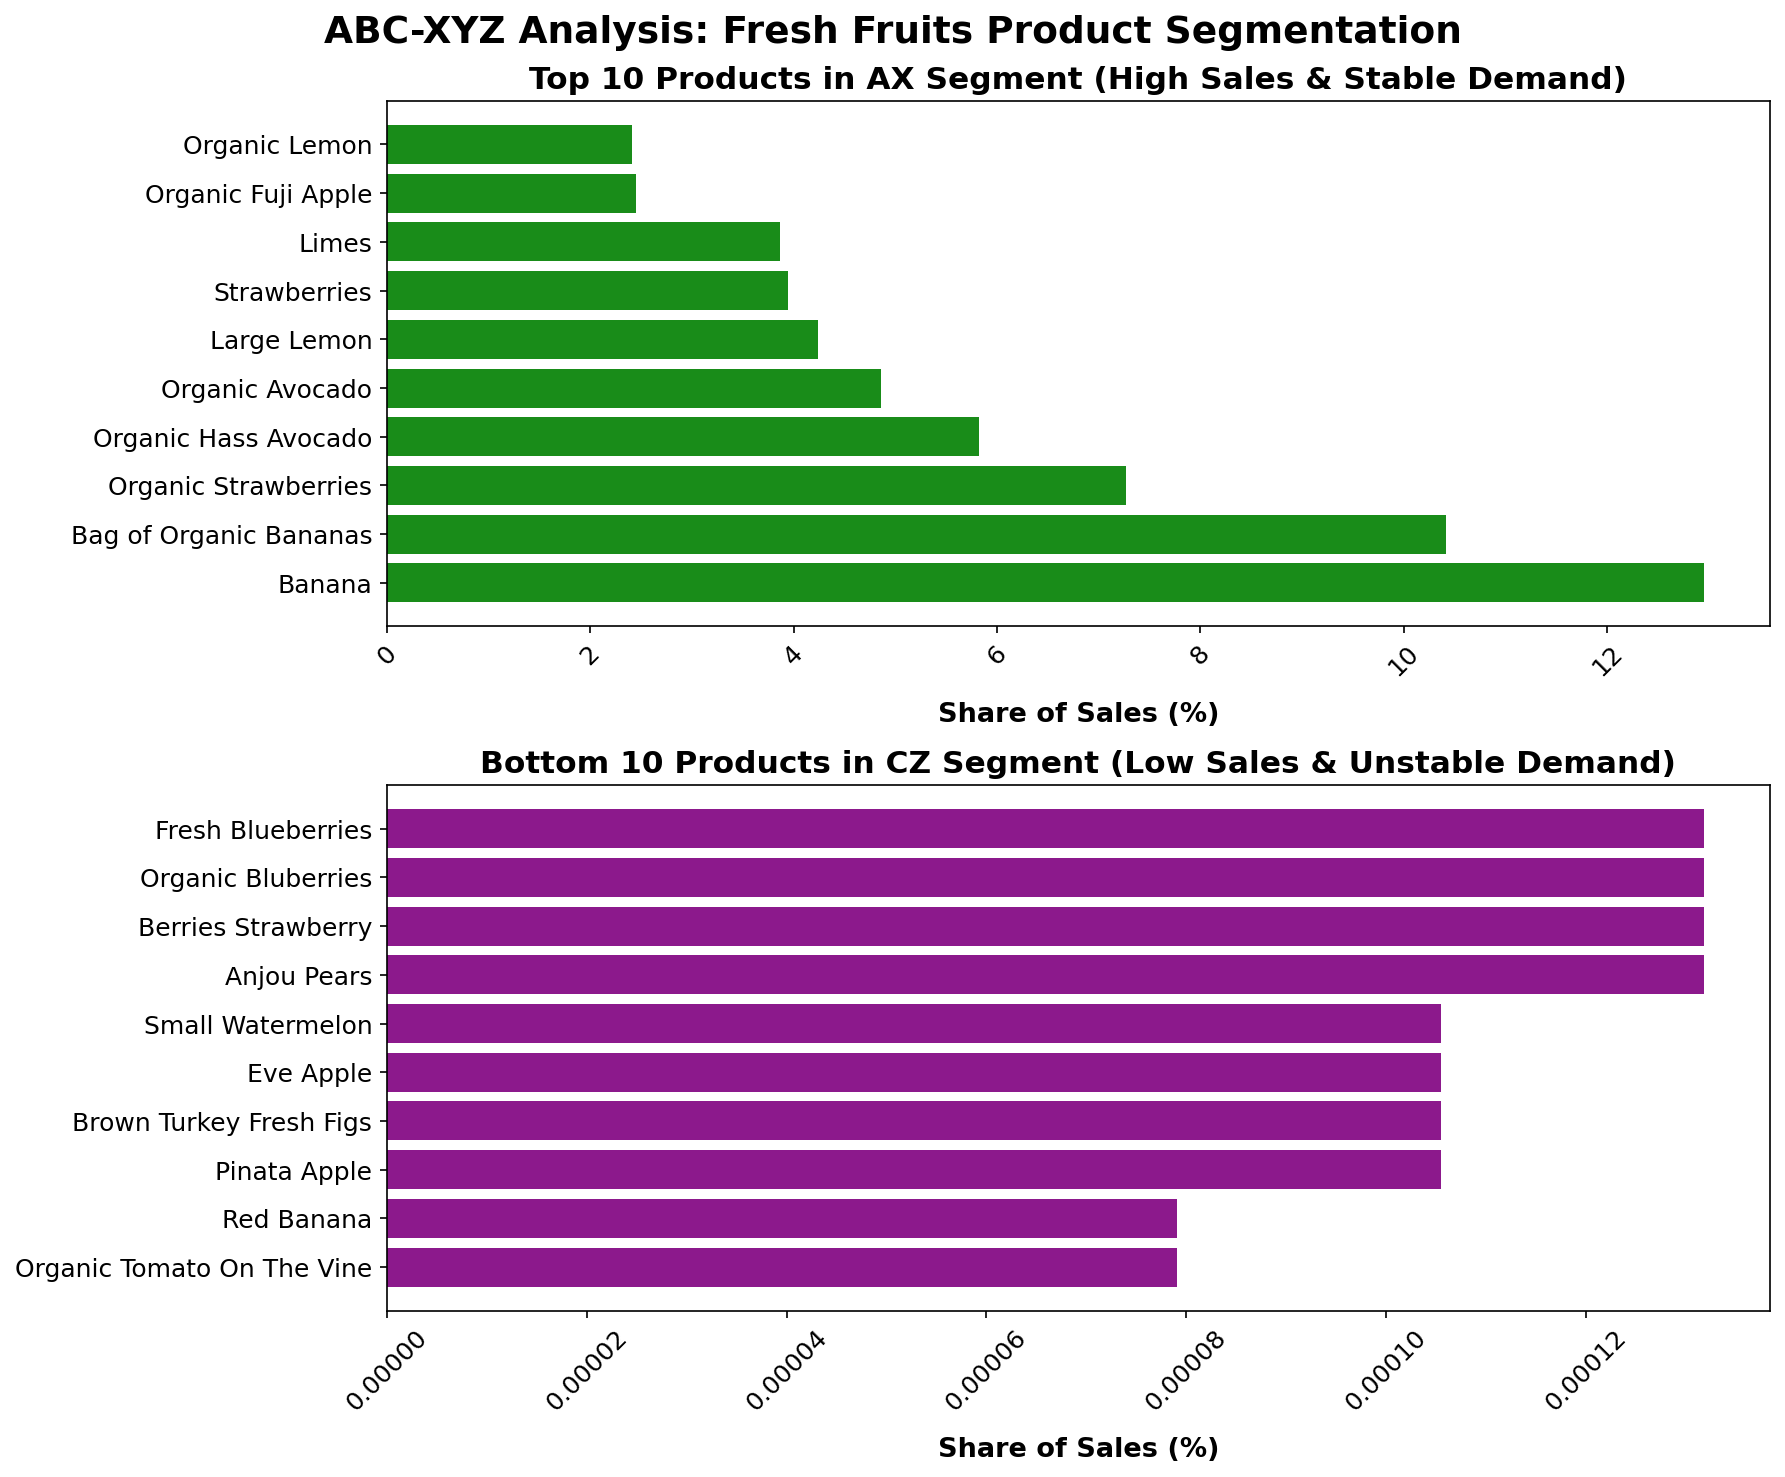

In [53]:
fig, ax= plt.subplots(figsize = (12,10), dpi = 150, nrows = 2, ncols = 1)

ax[0].barh(top_10_fresh_fruits['product_name'], top_10_fresh_fruits['proportion'], color = 'green', alpha = 0.9)
ax[1].barh(tail_10_fresh_fruits['product_name'], tail_10_fresh_fruits['proportion'], color = 'purple', alpha = 0.9)

for a in ax:
    a.grid(True, linestyle = '', alpha = 0.6)
    a.tick_params(axis = 'y', labelsize = 12)
    a.tick_params(axis = 'x', labelsize = 12, rotation = 45)

fig.suptitle('ABC-XYZ Analysis: Fresh Fruits Product Segmentation', fontsize = 18, fontweight = 'bold')
ax[0].set_title('Top 10 Products in AX Segment (High Sales & Stable Demand)', fontsize = 15, fontweight = 'bold')
ax[0].set_xlabel('Share of Sales (%)', fontsize = 13, fontweight = 'bold', labelpad = 10)
ax[1].set_title('Bottom 10 Products in CZ Segment (Low Sales & Unstable Demand)', fontsize = 15, fontweight = 'bold')
ax[1].set_xlabel('Share of Sales (%)', fontsize = 13, fontweight = 'bold', labelpad = 10)

plt.savefig(os.path.join(output_dir, "fresh_fruit_top_bottom_10.png"), dpi = 100, bbox_inches = "tight")

plt.tight_layout();

# ABC–XYZ Analysis: Fresh Fruits

Measured sales contribution (ABC) and demand stability (XYZ), combining into a product matrix.

## Limitations:

Artificial time bins (days_bin) instead of real dates → no seasonality captured.

XYZ skewed at aisle level, but more balanced at product level.

## Results:

AX = 24 products (core demand).

BX = 58 products (important, less dominant).

105 products in CZ (low importance alongside unstable demand).

Top AX = bananas, strawberries, avocados. Bottom CZ = niche exotics (figs, rare apples).

Insight: a few products drive the majority of aisle sales, long tail adds variety.

# ------------------------------------------------
# 10. Product Analysis& Opportunities in Lowest-Share Category
# ------------------------------------------------

In [54]:
frozen_juice_df = full_df[full_df['aisle'] == 'frozen juice'].reset_index(drop = True).copy()

frozen_juice_abc = (frozen_juice_df['product_name'].value_counts(normalize = True)*100).sort_values(ascending = False).reset_index()

frozen_juice_abc['cum_proportion'] = frozen_juice_abc['proportion'].cumsum()

frozen_juice_abc['abc_segment'] = frozen_juice_abc['cum_proportion'].apply(abc_segmentation)

In [55]:
prod_bin = (frozen_juice_df.groupby(['days_bin', 'product_name'], observed = False).size().reset_index(name = 'sales'))

prod_bin_totals = (frozen_juice_df.groupby('days_bin', observed = False).size().reset_index(name = 'total_sales'))

prod_bin = prod_bin.merge(prod_bin_totals, on = 'days_bin', how = 'left')

prod_bin['share'] = prod_bin['sales'] / prod_bin['total_sales']

frozen_juice_xyz = (prod_bin.groupby('product_name', observed = False).agg(mean_share = ('share', 'mean'), std_share = ('share', 'std')).reset_index())

frozen_juice_xyz['cv'] = frozen_juice_xyz['std_share'] / frozen_juice_xyz['mean_share']

frozen_juice_xyz['xyz_segment'] = frozen_juice_xyz['cv'].apply(xyz_segmentation)

In [56]:
abc_xyz_prod = frozen_juice_abc.merge(frozen_juice_xyz[['product_name', 'xyz_segment']], how = 'left', on = 'product_name')

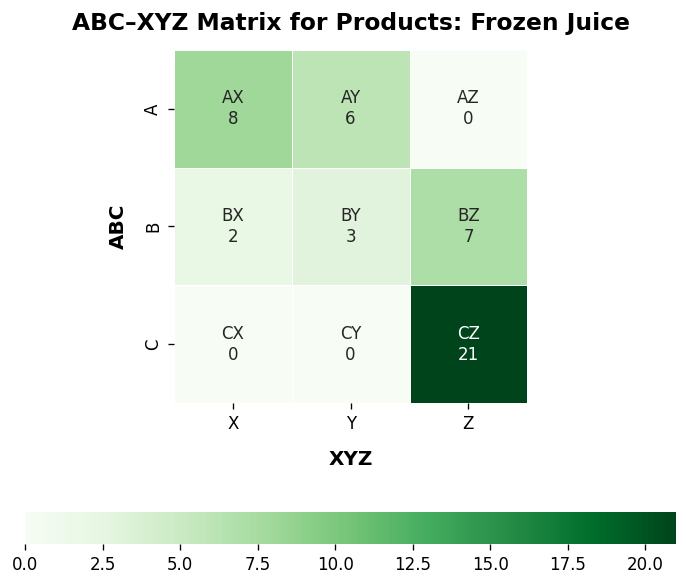

In [57]:
matrix_prod = abc_xyz_prod.groupby(['abc_segment','xyz_segment']).size().unstack(fill_value = 0).reindex(index = abc_order, columns = xyz_order, fill_value = 0)


plt.figure(figsize = (7, 6), dpi = 120)

labels = matrix_prod.copy().astype(str)
for i in matrix_prod.index:
    for j in matrix_prod.columns:
        labels.loc[i, j] = f"{i}{j}\n{matrix_prod.loc[i, j]}"


sns.heatmap(matrix_prod, fmt = '', cmap = 'Greens', annot = labels, cbar = True, linewidths = 0.5, linecolor = 'white', cbar_kws = {'orientation': 'horizontal', 'pad':0.20}, square = True)
plt.title('ABC–XYZ Matrix for Products: Frozen Juice', fontsize = 14, fontweight = 'bold', pad = 12)
plt.ylabel('ABC', fontsize = 12, fontweight = 'bold', labelpad = 10)
plt.xlabel('XYZ', fontsize = 12, fontweight = 'bold', labelpad = 10)

plt.savefig(os.path.join(output_dir, "ABC_XYZ_frozen_juice_matrix.png"), dpi = 100, bbox_inches = "tight");

In [58]:
top_10_frozen_juice = abc_xyz_prod[(abc_xyz_prod['abc_segment'] == 'A') & 
(abc_xyz_prod['xyz_segment'] == 'X')].nlargest(10, 'proportion')[['product_name', 'proportion']].reset_index(drop = True)

tail_10_frozen_juice = abc_xyz_prod[(abc_xyz_prod['abc_segment'] == 'C') & 
(abc_xyz_prod['xyz_segment'] == 'Z')].nsmallest(10, 'proportion')[['product_name', 'proportion']].reset_index(drop = True)

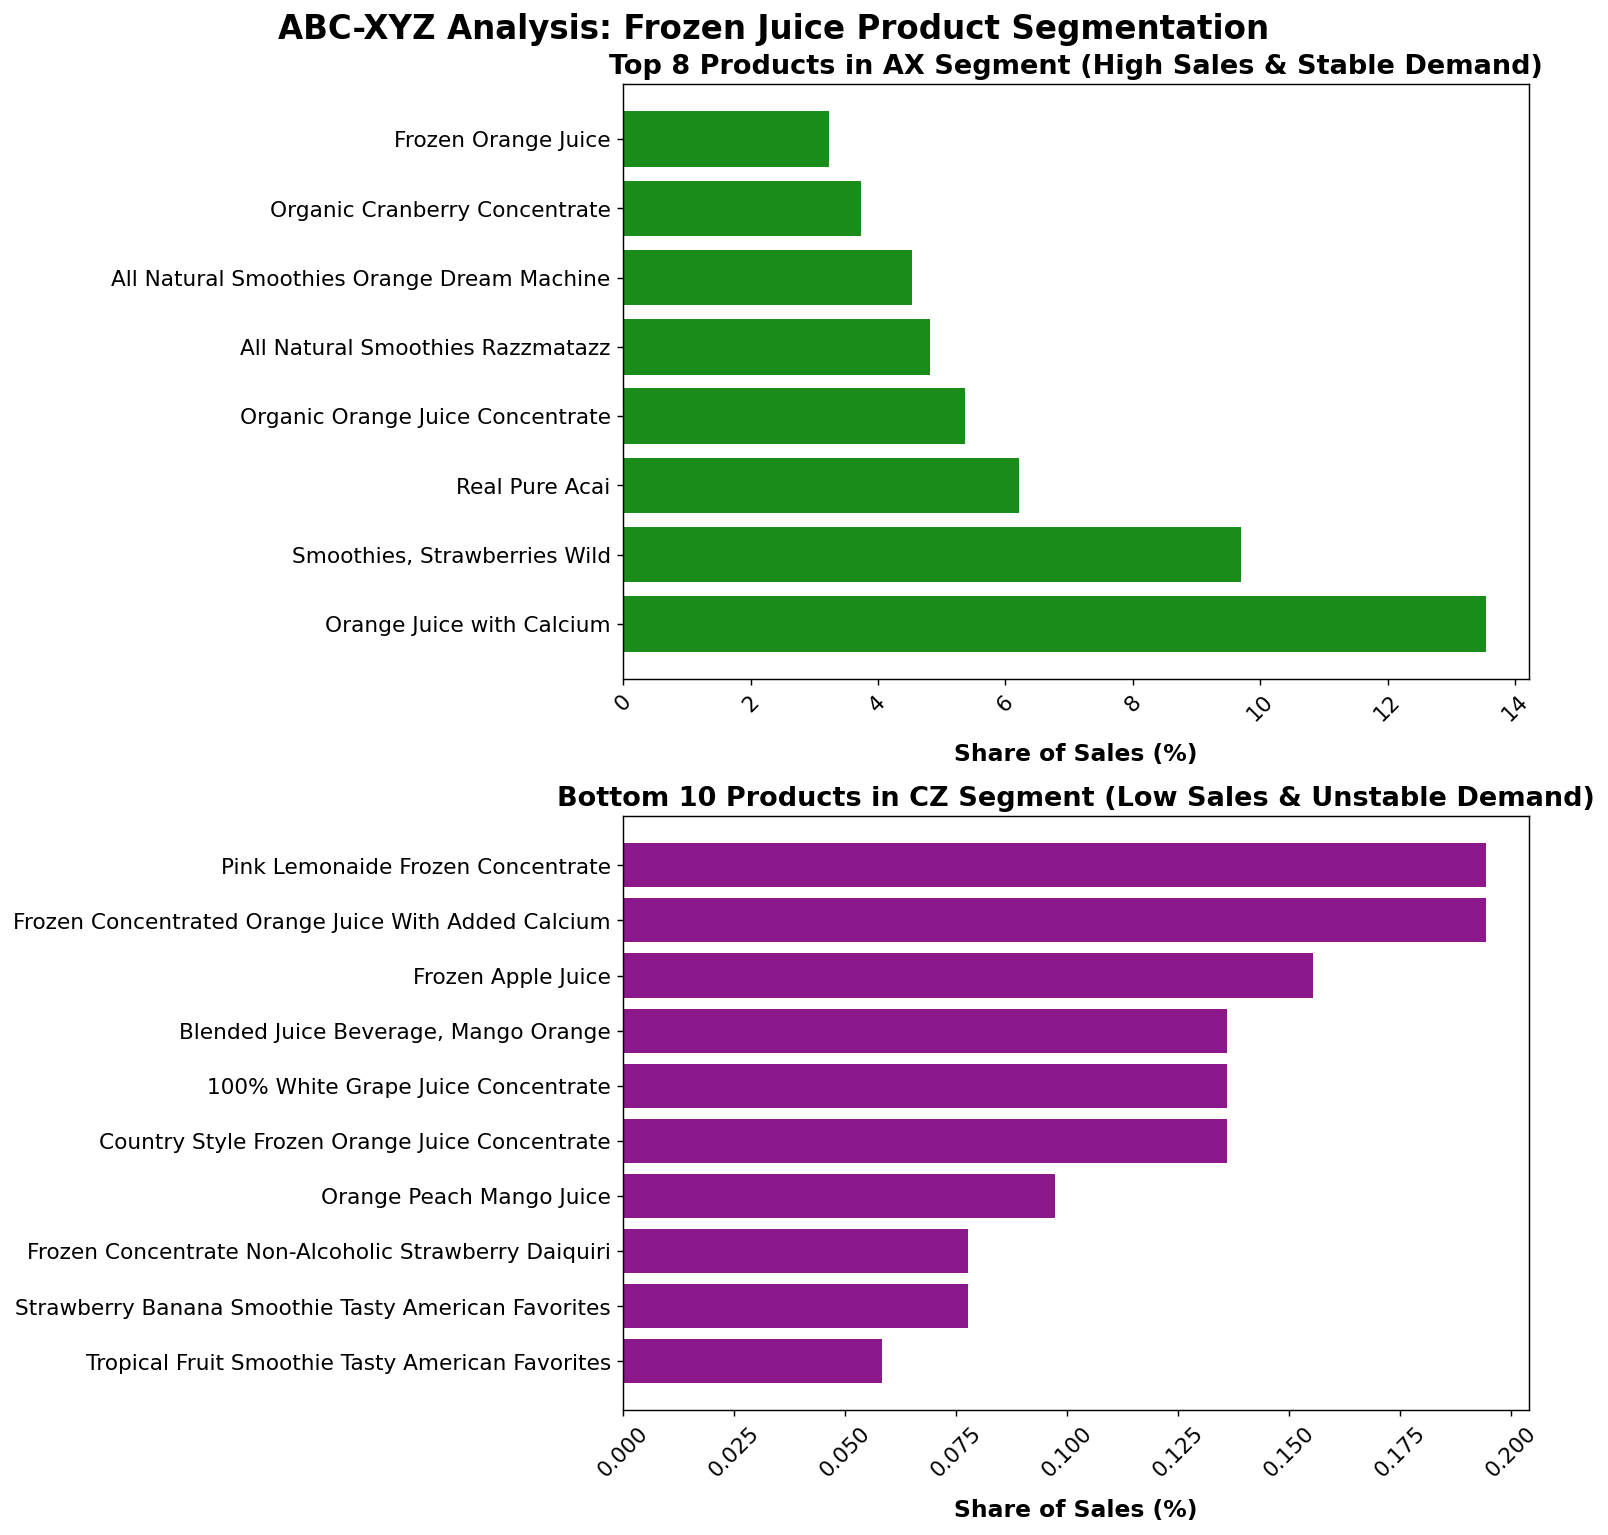

In [59]:
fig, ax = plt.subplots(figsize = (12,12), dpi = 130, nrows = 2, ncols = 1)

ax[0].barh(top_10_frozen_juice['product_name'], top_10_frozen_juice['proportion'], color ='green', alpha = 0.9)
ax[1].barh(tail_10_frozen_juice['product_name'], tail_10_frozen_juice['proportion'], color ='purple', alpha = 0.9)

for a in ax:
    a.grid(True, linestyle = '', alpha = 0.6)
    a.tick_params(axis = 'y', labelsize = 12)
    a.tick_params(axis = 'x', labelsize = 12, rotation = 45)

fig.suptitle('ABC-XYZ Analysis: Frozen Juice Product Segmentation', fontsize = 18, fontweight = 'bold')
ax[0].set_title('Top 8 Products in AX Segment (High Sales & Stable Demand)', fontsize = 15, fontweight = 'bold')
ax[0].set_xlabel('Share of Sales (%)', fontsize = 13, fontweight = 'bold', labelpad = 10)
ax[1].set_title('Bottom 10 Products in CZ Segment (Low Sales & Unstable Demand)', fontsize = 15, fontweight = 'bold')
ax[1].set_xlabel('Share of Sales (%)', fontsize = 13, fontweight = 'bold', labelpad = 10)

plt.savefig(os.path.join(output_dir, "frozen_juice_top_bottom.png"), dpi = 100, bbox_inches = "tight")

plt.tight_layout();

# Frozen Juice Insights (ABC-XYZ)

The Frozen Juice aisle shows much narrower structure compared to Fresh Fruits.

- Main contribution from AX products (8 items) — mostly classic orange juices and smoothies.
- The C segment (21 items) is entirely Z, showing low sales and unstable demand.
- Top 8 AX products make up 50%+ of sales, CZ items negligible.
- Insight: highly concentrated market around a few key products; CZ items should be reduced and streamlined to best performing products.

# ------------------------------------------------
# 11. Conclusions & Recommendations
# ------------------------------------------------

# Final Findings

- Reorders: concentrated around essential products. First items in the cart (dairy, produce, beverages) show the highest reorder rates and are items to maintain stock.
- RFM and ABC-XYZ analysis: a small portion of customers and products generate most revenue (Pareto 20/80), highlighting focus on high-value segments and unstable categories. Identifies key focal points and potential streamlining of resources.
- Temporal patterns: peak activity 9 AM–2 PM; weekends and Monday busiest; minimal orders at night; reduced order volume through working week.
- Cart structure: first 3–5 items most likely to be reordered; later positions more random/spontaneous; essentials are always remembered and then later positions likely represent random browsing.
- Top-performing products: stand out by frequency and high reorder rate, useful for cross-sell, retention, and stock management.
- Bottom-performing products: evaluates unstable demand products and help to streamline stock to more valuable products ro avoid losses.

# Business recommendations:

- Target campaigns at golden hours (9 AM–2 PM) and weekends.
- Strengthen retention for high-frequency, recent buyers (top RFM segments).
- Nurture developing customers that are ordering more frequently.
- Bundle high-reorder products with less stable categories as deals to stabilise volatile products.
- Adjust logistics and personal shopper resources to align with peak times.